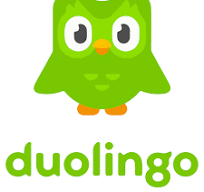
# **Duolingo Customer Engagement Analysis**

# **About this Project**



---
- Duolingo wants to launch new features to make learning more fun and engaging by analysing how users learn and progress on the platform in order to boost overall platform engagement and learning success rate.
- One of these features is "Week in Review", which will show key details about each user and compare them to trends across the platform. It’s similar to Spotify’s or YouTube’s "Year in Review."
- The goal is to uncover insights that will:

  -- Help Duolingo improve its strategies to keep users engaged and learning.

  -- Provide users with a fun, personalised recap to make learning more rewarding and engaging.


# **Dataset Overview**

---



***Here's an explanation of the data columns:***

Imagine we’re analyzing a Duolingo lesson where a student is learning the word “cat” (in Spanish: “gato”). Here's what each column would represent:
1.	**p_recall** (Proportion of Recall Accuracy)

  --	Definition: The proportion of exercises in this lesson where the word (or lexeme) was correctly recalled by the student.

  --	Example: If the student encountered "gato" in 5 exercises and correctly recalled it in 4, the p_recall value would be 0.8 (4/5).
2.	**timestamp** (Time of the Lesson)
  
  --	Definition: The timestamp indicating when the current lesson or practice took place.
3.	**delta** (Time Gap)

  --	Definition: The time (in seconds) since the last lesson or practice where this specific word (lexeme) was encountered.

  -- Example: If the student last practiced "gato" 2 days ago (48 hours = 172800 seconds), the delta value would be 172800.
4.	**user_id** (Student ID)

  -- Definition: An anonymized ID representing the student who completed the lesson or practice.
5.	**learning_language** (Language Being Learned)

  --	Definition: The target language that the student is learning.

  --	Example: If the student is learning Spanish, this column would show "es" (language code for Spanish).
6.	**ui_language** (User Interface Language)

  --	Definition: The language of the app’s user interface, which is usually the student's native language.

  --	Example: If the student’s app is in English, this column would show "en".
7.	**lexeme_id** (Lexeme Tag ID)

  --	Definition: A system-generated unique ID for the word or lexeme being practiced.
  
  --	Example: If “gato” is represented by the ID 123abc456, this column would show 123abc456.
8.	**lexeme_string** (Lexeme Tag)

  --	Definition: A detailed grammar tag describing the lexeme (word), including its properties like tense, gender, and plurality.

  --	Example: For “gato” (a masculine singular noun), the tag might look like "gato", where it could means noun, masculine, singular
  
  --	More Details on lexeme tags is shared here: https://docs.google.com/spreadsheets/d/11PboM69gIuK2V51l_pK-WEwjkPTpGFuLGCWVggzG7l8/edit?gid=0#gid=0

9.	**history_seen** (Times Seen Before)

  --	Definition: The total number of times the student has encountered this word (lexeme) in lessons or practice sessions before this one.

  --	Example: If the student has seen “gato” in 10 exercises before, this column would show 10.
10.	**history_correct** (Times Correct Before)

  --	Definition: The total number of times the student correctly recalled this word (lexeme) in previous lessons or practice sessions.

  --	Example: If the student has correctly recalled “gato” in 7 out of 10 past exercises, this column would show 7.
11.	**session_seen** (Times the Word/Lexeme Was Seen in the Current Session)

  --	Definition: This column indicates how many times the student encountered the specific word or lexeme during the current lesson or practice session.

  --	Example: Imagine the student is learning "gato" in their current lesson. During this session:

  The student encounters "gato" in 3 different exercises (e.g., a multiple-choice question, a fill-in-the-blank exercise, and a sentence translation).
  
  The value in the session_seen column would be 3, representing the total encounters with "gato" in this session.
12.	**session_correct** (Times the Word/Lexeme Was Correctly Recalled in the Current Session)

  --	Definition: This column indicates how many times the student correctly recalled or answered the specific word or lexeme during the current lesson or practice session.

  --	Example: Continuing with "gato":

      The student was correct in 2 out of the 3 exercises where "gato" appeared during the current session.
      
      The value in the session_correct column would be 2, representing the total number of correct responses for "gato" in this session.


# **Analysis And Visualization**

---
We will complete the entire Analysis and Visualization of the data in the following steps:

- IMPORTING LIBRARIES AND DATASET
- DATA UNDERSTANDING and DATA TYPES
- DATA WRANGLING
- EXPLORATORY DATA ANALYSIS AND VISUALISATION


## 1. **IMPORTING LIBRARIES AND DATASET**

### Importing the Libraries ⏬

In [1]:
# importing pandas, numpy, seaborn and matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset from gdrive link ⏬

In [2]:
# Install gdown
!pip install gdown

# Import the file from Google Drive
import gdown

# File ID and URL
file_id = "1Jhl4lWVCMsvuWzTVY7hYCE88AMv-f1-7"
url = f"https://drive.google.com/uc?id={file_id}"

# Output file name
output = "duolingo_data.csv"

# Download the file
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=1Jhl4lWVCMsvuWzTVY7hYCE88AMv-f1-7
From (redirected): https://drive.google.com/uc?id=1Jhl4lWVCMsvuWzTVY7hYCE88AMv-f1-7&confirm=t&uuid=b8bc72cd-5fd7-4411-9ce2-7d6fd2972825
To: /content/duolingo_data.csv
100%|██████████| 409M/409M [00:05<00:00, 79.6MB/s]


In [3]:
# let's see what the dataset looks like
data.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,2013-03-03 17:13:47,1825254,5C7,fr,en,3712581f1a9fbc0894e22664992663e9,sur/sur<pr>,2,1,2,2
1,1.0,2013-03-04 18:30:50,367,fWSx,en,es,0371d118c042c6b44ababe667bed2760,police/police<n><pl>,6,5,2,2
2,0.0,2013-03-03 18:35:44,1329,hL-s,de,en,5fa1f0fcc3b5d93b8617169e59884367,hat/haben<vbhaver><pri><p3><sg>,10,10,1,0
3,1.0,2013-03-07 17:56:03,156,h2_R,es,en,4d77de913dc3d65f1c9fac9d1c349684,en/en<pr>,111,99,4,4
4,1.0,2013-03-05 21:41:22,257,eON,es,en,35f14d06d95a34607d6abb0e52fc6d2b,caballo/caballo<n><m><sg>,3,3,3,3


## 2. **DATA UNDERSTANDING AND DATA TYPES**

In [4]:
data.columns

Index(['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen',
       'history_correct', 'session_seen', 'session_correct'],
      dtype='object')

In [9]:
# returning the rows and coloumns of the dataset
data.shape
print(f'The total number of rows and columns are {data.shape}  respectively.')

The total number of rows and columns are (3795780, 12)  respectively.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795780 entries, 0 to 3795779
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   p_recall           float64
 1   timestamp          object 
 2   delta              int64  
 3   user_id            object 
 4   learning_language  object 
 5   ui_language        object 
 6   lexeme_id          object 
 7   lexeme_string      object 
 8   history_seen       int64  
 9   history_correct    int64  
 10  session_seen       int64  
 11  session_correct    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 347.5+ MB


We do notice from the above cell ⏫ that some of the columns need to be changed to appropriate data types

In [11]:
#describing all the columns with statistical summary:
data.describe()

,p_recall,delta,history_seen,history_correct,session_seen,session_correct
count,3.795780e+06,3.795780e+06,3.795780e+06,3.795780e+06,3.795780e+06,3.795780e+06
mean,8.964675e-01,7.055116e+05,2.197719e+01,1.949662e+01,1.808655e+00,1.636209e+00
std,2.711188e-01,2.211979e+06,1.283616e+02,1.136178e+02,1.350644e+00,1.309628e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,5.180000e+02,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,7.609500e+04,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,4.346412e+05,1.500000e+01,1.300000e+01,2.000000e+00,2.000000e+00
max,1.000000e+00,3.964973e+07,1.344200e+04,1.281600e+04,2.000000e+01,2.000000e+01


### Checking the duplicates and handling it.

In [12]:
# sum of all the duplicated rows

data.duplicated().sum()

22

In [13]:
# dropping all the duplicate values and making permanent changes without any duplicates

data = data.drop_duplicates()
data.duplicated().sum()

0

### Checking for null values in the dataset and handling it if found

In [14]:
data.isna().sum()

,0
p_recall,0
timestamp,0
delta,0
user_id,0
learning_language,0
ui_language,0
lexeme_id,0
lexeme_string,0
history_seen,0
history_correct,0


No null values could be found in he data as found above ⏫

### Changing necessary data type changes

We have 'timestamp' column which has object dtype, let us change it to datetime format so that we can make analysis based on that.

The reason this is necessary is because we might need to extract the hours and date or even the day part from the column which is only possible and valid if we have a datetime formatted column with us.

In [15]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [16]:
#checking if the changes have been made in the main dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3795758 entries, 0 to 3795779
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   p_recall           float64       
 1   timestamp          datetime64[ns]
 2   delta              int64         
 3   user_id            object        
 4   learning_language  object        
 5   ui_language        object        
 6   lexeme_id          object        
 7   lexeme_string      object        
 8   history_seen       int64         
 9   history_correct    int64         
 10  session_seen       int64         
 11  session_correct    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 376.5+ MB


In [17]:
# Unique values in each column od the dataset

for x in data.columns.tolist():
  print(f'Unique Values in {x}: {data[x].nunique()}')

Unique Values in p_recall: 66
Unique Values in timestamp: 334848
Unique Values in delta: 808491
Unique Values in user_id: 79694
Unique Values in learning_language: 6
Unique Values in ui_language: 4
Unique Values in lexeme_id: 16244
Unique Values in lexeme_string: 15864
Unique Values in history_seen: 3784
Unique Values in history_correct: 3308
Unique Values in session_seen: 20
Unique Values in session_correct: 21


THINGS THAT WE FIND HERE ABOUT DIFFERENT COLUMNS THAT WE NEED TO CONSIDER FOR FUTURE ANALYSIS :

- There is no point in deep analysis on the individuality of columns like timestamp, delta, user_id

## **DATA WRANGLING**

In this section we will be trying to make some changes and do some feature engineering to add, alter or delete in the existing data to make it more flexible and manageable to do data analysis

In [18]:
# Going deep on the 'timestamp' column

data['timestamp'].max()

Timestamp('2013-03-08 00:00:00')

In [19]:
data['timestamp'].min()

Timestamp('2013-03-01 00:00:00')

So basically this entire column has a very short period of timeline which is from **1st March 2013** to **8th March 2013**.



It makes no sense to extract the month part or days in the month as it is very short date range so we can **extract the date, time, days and hours** from this column for further EDA.

### Extracting date and time related columns

In [21]:
# Extracting the Date, Time, Days, Hours from 'timestamp' column

data['date']= data['timestamp'].dt.date
data['time']= data['timestamp'].dt.time
data['day']= data['timestamp'].dt.day_name()
data['hour']= data['timestamp'].dt.hour

#checking how the new engineered coluns are compared to the parent column

data[['timestamp','date','time','day','hour']].head(5)

,timestamp,date,time,day,hour
0,2013-03-03 17:13:47,2013-03-03,17:13:47,Sunday,17
1,2013-03-04 18:30:50,2013-03-04,18:30:50,Monday,18
2,2013-03-03 18:35:44,2013-03-03,18:35:44,Sunday,18
3,2013-03-07 17:56:03,2013-03-07,17:56:03,Thursday,17
4,2013-03-05 21:41:22,2013-03-05,21:41:22,Tuesday,21


We have the required data that can be retrieved from 'timestamp' column. We can now delete the parent column as it will only increase the size of our dataset.

In [22]:
# deleting the 'timestamp' column

data.drop(columns = 'timestamp', inplace= True)
data.head()

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,date,time,day,hour
0,1.0,1825254,5C7,fr,en,3712581f1a9fbc0894e22664992663e9,sur/sur<pr>,2,1,2,2,2013-03-03,17:13:47,Sunday,17
1,1.0,367,fWSx,en,es,0371d118c042c6b44ababe667bed2760,police/police<n><pl>,6,5,2,2,2013-03-04,18:30:50,Monday,18
2,0.0,1329,hL-s,de,en,5fa1f0fcc3b5d93b8617169e59884367,hat/haben<vbhaver><pri><p3><sg>,10,10,1,0,2013-03-03,18:35:44,Sunday,18
3,1.0,156,h2_R,es,en,4d77de913dc3d65f1c9fac9d1c349684,en/en<pr>,111,99,4,4,2013-03-07,17:56:03,Thursday,17
4,1.0,257,eON,es,en,35f14d06d95a34607d6abb0e52fc6d2b,caballo/caballo<n><m><sg>,3,3,3,3,2013-03-05,21:41:22,Tuesday,21


### New Percent Columns for history and session studies

---
We are going to add new columns 'history_perc' and 'session_perc' which will be derived from history and session columns to measure the performance of an user_id in percent value.

**history_perc = history_correct / history_seen**

**session_perc = session_correct / session_seen**


In [24]:
data['history_perc'] = (data['history_correct']*100.0)/data['history_seen']    # performance history for all user_ids
data['session_perc'] = (data['session_correct']*100.0)/data['session_seen']    # recent performance for all user_ids

# Rounding off the percent values to 2 decimals
data['history_perc'] = data['history_perc'].round(2)
data['session_perc'] = data['session_perc'].round(2)

Let us also make new column 'Growth' as difference in "session_perc - history_perc" to help see if the user id current growth trend.

i.e. **Growth = session_perc - history_perc**

In [25]:
data['Growth']= (data['session_perc']-data['history_perc']).round(2)

We can categorize the Growth column as well into Negative, Low, Medium, High

In [26]:
# setting up the conditions and categories for Growth values

#laying the conditions to divide up the Growth columns
gr_conditions = [data['Growth']<0,(data['Growth']>=0) & (data['Growth']<30), (data['Growth']>=30) & (data['Growth']<60), data['Growth']>=60]

# Categories for the conditions to match
gr_cats = ['Negative','Low','Medium','High']

In [27]:
# Assigning a new column for the Categories for Growth

data['Growth_cat'] = np.select(gr_conditions,gr_cats, default='Unknown')
data[['history_perc','session_perc','Growth','user_id','Growth_cat']].head()

,history_perc,session_perc,Growth,user_id,Growth_cat
0,50.00,100.0,50.00,5C7,Medium
1,83.33,100.0,16.67,fWSx,Low
2,100.00,0.0,-100.00,hL-s,Negative
3,89.19,100.0,10.81,h2_R,Low
4,100.00,100.0,0.00,eON,Low


### Categorising the Users based on their p_recall values

In [ ]:
# setting up the conditions and categories for p_recall values

#laying the conditions to divide up the p_recall columns
pr_conditions = [data['p_recall']<0,(data['p_recall']>=0) & (data['p_recall']<0.30), (data['p_recall']>=0.30) & (data['p_recall']<0.60), data['p_recall']>=0.60]

# Categories for the conditions to match
pr_cats = ['Negative','Low','Medium','High']

In [ ]:
# Assigning a new column for the Categories of Users

data['performance_cat'] = np.select(pr_conditions,pr_cats, default='Unknown')
data[['p_recall','user_id','performance_cat']].head()

,p_recall,user_id,performance_cat
0,1.0,5C7,High
1,1.0,fWSx,High
2,0.0,hL-s,Low
3,1.0,h2_R,High
4,1.0,eON,High


So We are ready to delve deeper for analysis and visualization with our final version of cleaned and manipulated dataset.


In [ ]:
data.head(10)

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,date,time,day,hour,history_perc,session_perc,Growth,Growth_cat,performance_cat
0,1.0,1825254,5C7,fr,en,3712581f1a9fbc0894e22664992663e9,sur/sur<pr>,2,1,2,2,2013-03-03,17:13:47,Sunday,17,50.00,100.0,50.00,Medium,High
1,1.0,367,fWSx,en,es,0371d118c042c6b44ababe667bed2760,police/police<n><pl>,6,5,2,2,2013-03-04,18:30:50,Monday,18,83.33,100.0,16.67,Low,High
2,0.0,1329,hL-s,de,en,5fa1f0fcc3b5d93b8617169e59884367,hat/haben<vbhaver><pri><p3><sg>,10,10,1,0,2013-03-03,18:35:44,Sunday,18,100.00,0.0,-100.00,Negative,Low
3,1.0,156,h2_R,es,en,4d77de913dc3d65f1c9fac9d1c349684,en/en<pr>,111,99,4,4,2013-03-07,17:56:03,Thursday,17,89.19,100.0,10.81,Low,High
4,1.0,257,eON,es,en,35f14d06d95a34607d6abb0e52fc6d2b,caballo/caballo<n><m><sg>,3,3,3,3,2013-03-05,21:41:22,Tuesday,21,100.00,100.0,0.00,Low,High
5,1.0,200,6ed,en,es,f19bad09b7354d4cf02403544519d849,dinner/dinner<n><sg>,10,10,1,1,2013-03-03,16:58:20,Sunday,16,100.00,100.0,0.00,Low,High
6,1.0,299,h8Nf,fr,en,b93cbb826a0a2c5a0f326747c0d2157a,citron/citron<n><m><sg>,4,4,3,3,2013-03-01,01:24:44,Friday,1,100.00,100.0,0.00,Low,High
7,1.0,21378,h8O8,it,en,f91af00c0bb36ee5f1c19e83d9f99ad5,sua/sua<prn><pos><f><sg>,12,11,1,1,2013-03-01,13:56:38,Friday,13,91.67,100.0,8.33,Low,High
8,1.0,415598,gkOJ,fr,en,1b279bb64bd6eba51ab37e4a61aad0c4,mes/mon<det><pos><mf><pl>,5,3,3,3,2013-03-04,21:31:01,Monday,21,60.00,100.0,40.00,Medium,High
9,1.0,199,hYCT,es,en,a296a278d774a2987ef34a4a463cbce5,tiene/tener<vblex><pri><p3><sg>,13,12,1,1,2013-03-01,15:12:45,Friday,15,92.31,100.0,7.69,Low,High


### Exploring the Diversity in Lexeme Strings

We have a column 'lexeme_string' that contains the details on the type of word we are looking at here.

We can extract the type of word and make a separate column to check the diversities of the words and furthermore compare it with other columns

In [ ]:
# Creating new column from string column

data['lexeme_type'] = data['lexeme_string'].str.split('<').str[1].str.split('>').str[0]
data.head()

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,...,date,time,day,hour,history_perc,session_perc,Growth,Growth_cat,performance_cat,lexeme_type
0,1.0,1825254,5C7,fr,en,3712581f1a9fbc0894e22664992663e9,sur/sur<pr>,2,1,2,...,2013-03-03,17:13:47,Sunday,17,50.00,100.0,50.00,Medium,High,pr
1,1.0,367,fWSx,en,es,0371d118c042c6b44ababe667bed2760,police/police<n><pl>,6,5,2,...,2013-03-04,18:30:50,Monday,18,83.33,100.0,16.67,Low,High,n
2,0.0,1329,hL-s,de,en,5fa1f0fcc3b5d93b8617169e59884367,hat/haben<vbhaver><pri><p3><sg>,10,10,1,...,2013-03-03,18:35:44,Sunday,18,100.00,0.0,-100.00,Negative,Low,vbhaver
3,1.0,156,h2_R,es,en,4d77de913dc3d65f1c9fac9d1c349684,en/en<pr>,111,99,4,...,2013-03-07,17:56:03,Thursday,17,89.19,100.0,10.81,Low,High,pr
4,1.0,257,eON,es,en,35f14d06d95a34607d6abb0e52fc6d2b,caballo/caballo<n><m><sg>,3,3,3,...,2013-03-05,21:41:22,Tuesday,21,100.00,100.0,0.00,Low,High,n


In [ ]:
print(f'the number of unique types of lexeme are: {data.lexeme_type.unique()}')

the number of unique types of lexeme are: ['pr' 'n' 'vbhaver' 'prn' 'det' 'vblex' '*sf' 'vbdo' 'vbser' 'adv' 'adj'
 '@ij:merci_beaucoup' 'cnjcoo' 'rel' 'num' 'np' 'cnjadv' 'ij' 'vbmod'
 'preadv' '@ij:thank_you' 'cnjsub' '@common_phrases:a_plus_tard'
 '@ij:auf_wiedersehen' 'vaux' '@ij:buenas_noches' '@cnj:des_que'
 '@common_phrases:ca_va_bien' '@common_phrases:a_bientot' 'gen' 'apos'
 '@cnj:parce_que' '@adv:a_part' '@ij:au_revoir' '@common_phrases:a_demain'
 '@common_phrases:il_y_a' '@adv:por_favor' '@itg:que_est_ce_que'
 '@pr:a_cause_de' '@adv:s_il_te_plait' 'predet'
 '@common_phrases:comment_ca_va' '@common_phrases:a_plus'
 '@cnj:du_fait_que' '@itg:est_ce_que' '@common_phrases:de_rien'
 '@adv:s_il_vous_plait' '@adv:en_fait' '@ij:bis_bald' '@pr:plus_de'
 '@ij:buenos_dias' 'pprep' '@cnj:depuis_que' '@cnj:alors_que'
 '@adv:en_general' '@adv:por_supuesto' '@adv:a_peu_pres'
 '@neg:pas_du_tout' '@pr:autant_de' '@cnj:tandis_que'
 '@prn:n_importe_quoi' '@adv:peut_etre' '@cnj:pendant_que' '@pr

As we can see, there are a lots of rubbish values that has been included here as well. We can try and extract meaningfull words from here

In [ ]:
# Defining a function to extract the words between @ and :

def extract_words (lexeme_type):
  if ('@' in lexeme_type) & (':' in lexeme_type):
    return lexeme_type.split('@')[1].split(':')[0]
  return lexeme_type

# applying the function on lexeme_type column
data['lexeme_type']=data['lexeme_type'].apply(extract_words)

# checking the current list of unique values:
data.lexeme_type.unique()

array(['pr', 'n', 'vbhaver', 'prn', 'det', 'vblex', '*sf', 'vbdo',
       'vbser', 'adv', 'adj', 'ij', 'cnjcoo', 'rel', 'num', 'np',
       'cnjadv', 'vbmod', 'preadv', 'cnjsub', 'common_phrases', 'vaux',
       'cnj', 'gen', 'apos', 'itg', 'predet', 'pprep', 'neg', 'ord'],
      dtype=object)

## **EXPLORATORY DATA ANALYSIS & VISUALIZATION**



###    **Learning Language and UI Language Distribution**


---

We start off by looking at the distribution of Languages that are being learned and used as UI in Duolingo.




In [ ]:
# Learning language Distribution
learning_data = data['learning_language'].value_counts().reset_index(name='session_count')
learning_data

,learning_language,session_count
0,en,1479926
1,es,1007678
2,fr,552704
3,de,425433
4,it,237961
5,pt,92056


In [ ]:
# UI Language Distribution
ui_data = data['ui_language'].value_counts().reset_index(name='session_count')
ui_data

,ui_language,session_count
0,en,2315832
1,es,1073885
2,pt,282884
3,it,123157



###   **Pie-Chart representation of languages for Learning & UI**



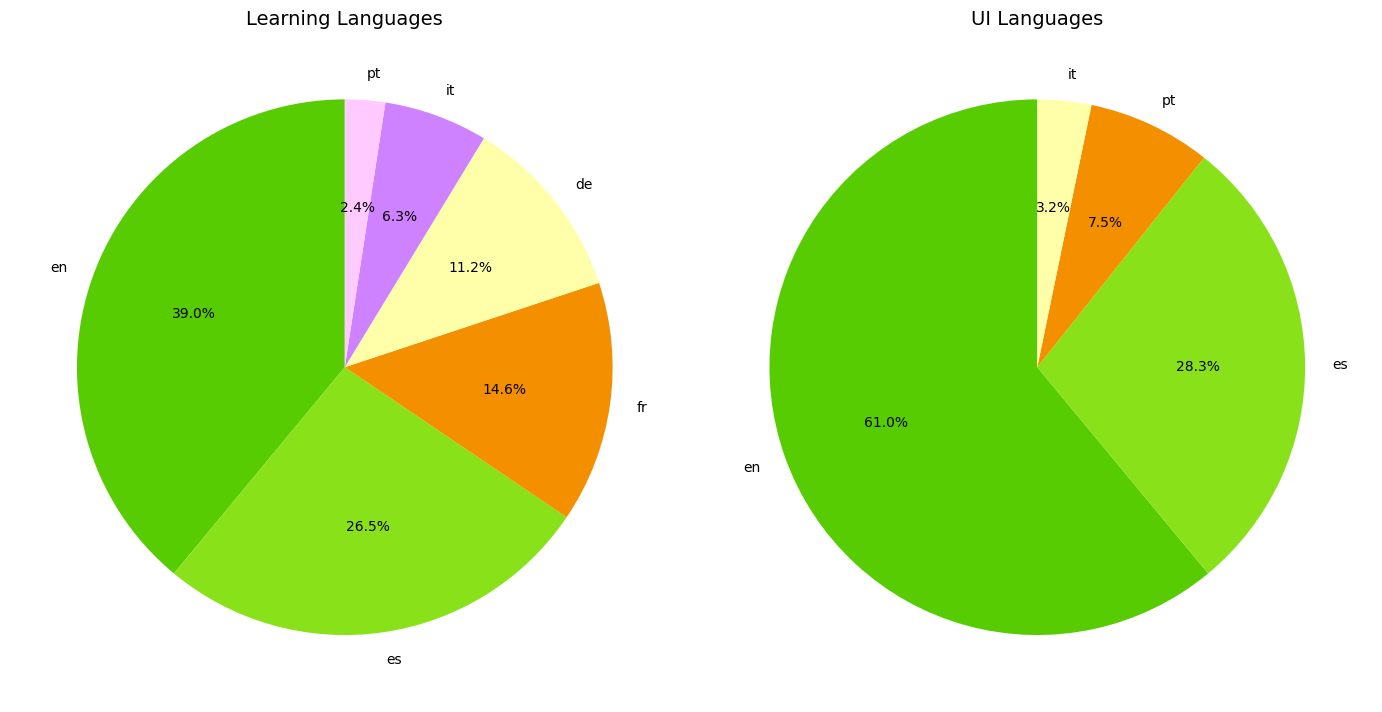

In [ ]:
# setting up color theme of Duolingo for our Visualization.
duolingo_colors = ['#58cc02', '#89e219', '#f49000', '#ffffaa', '#ce82ff', '#ffcaff', '#ffc800', '#ff9600', '#ce82ff', '#2b70c9', '#58cc02', '#43c000']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for learning languages
axes[0].pie(learning_data['session_count'], labels=learning_data['learning_language'], autopct='%1.1f%%', colors=duolingo_colors, startangle=90)
axes[0].set_title('Learning Languages', fontsize=14)

# Pie chart for UI languages
axes[1].pie(ui_data['session_count'], labels=ui_data['ui_language'], autopct='%1.1f%%', colors=duolingo_colors, startangle=90)
axes[1].set_title('UI Languages', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# We are geting a count of each categories of User Performance.

pr_cat_data = data['performance_cat'].value_counts().reset_index(name = 'count')
pr_cat_data

,performance_cat,count
0,High,3386294
1,Low,267454
2,Medium,142010


In [ ]:
# We are geting a count of each categories of User Growth Percent.

gr_cat_data = data['Growth_cat'].value_counts().reset_index(name = 'count')
gr_cat_data

,Growth_cat,count
0,Low,2959113
1,Negative,550179
2,Medium,268524
3,High,17942


### **Pictorial Representation of Performance & Growth Categorical Distribution**

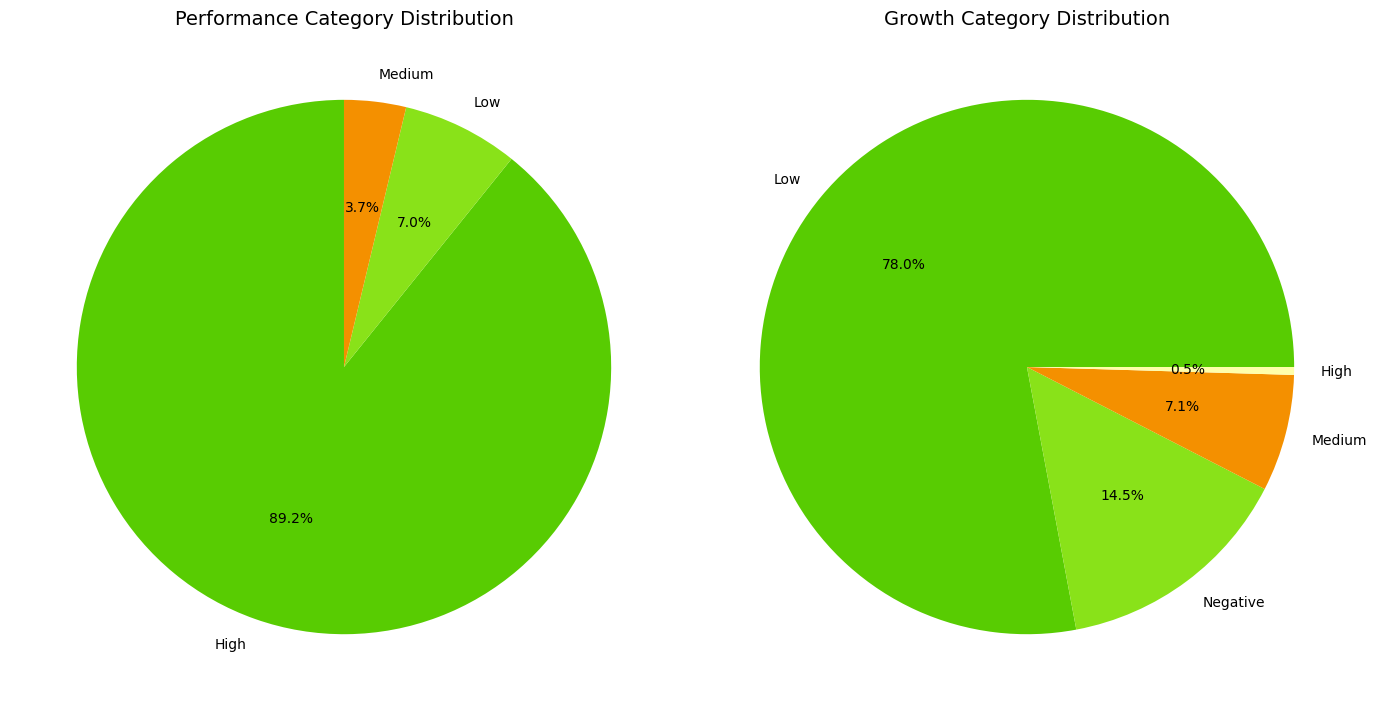

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (14,7))

axes[0].pie( pr_cat_data['count'], labels=pr_cat_data['performance_cat'], autopct = '%1.1f%%', colors = duolingo_colors, startangle = 90 )
axes[0].set_title('Performance Category Distribution', fontsize = 14)

axes[1].pie( gr_cat_data['count'],labels =gr_cat_data['Growth_cat'], autopct = '%1.1f%%', colors = duolingo_colors)
axes[1].set_title('Growth Category Distribution', fontsize = 14)

plt.tight_layout()

*   **Distribution of Performance (p_recall) Categories & Growth (growth_perc) Categories**


### **Daily and Hourly Trend**

In [ ]:
data.tail()

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,...,date,time,day,hour,history_perc,session_perc,Growth,Growth_cat,performance_cat,lexeme_type
3795775,1.0,4792,iZ7d,es,en,84e18e86c58e8e61d687dfa06b3aaa36,soy/ser<vbser><pri><p1><sg>,6,5,2,...,2013-03-06,23:06:48,Wednesday,23,83.33,100.0,16.67,Low,High,vbser
3795776,1.0,1369,hxJr,fr,en,f5b66d188d15ccb5d7777a59756e33ad,chiens/chien<n><m><pl>,3,3,2,...,2013-03-07,22:49:23,Thursday,22,100.00,100.0,0.00,Low,High,n
3795777,1.0,615997,fZeR,it,en,91a6ab09aa0d2b944525a387cc509090,voi/voi<prn><tn><p2><mf><pl>,25,22,2,...,2013-03-06,21:20:18,Wednesday,21,88.00,100.0,12.00,Low,High,prn
3795778,1.0,289,g_D3,en,es,a617ed646a251e339738ce62b84e61ce,are/be<vbser><pres>,32,30,2,...,2013-03-07,07:54:24,Thursday,7,93.75,100.0,6.25,Low,High,vbser
3795779,1.0,191,iiN7,pt,en,4a93acdbafaa061fd69226cf686d7a2b,café/café<n><m><sg>,3,3,1,...,2013-03-06,21:12:07,Wednesday,21,100.00,100.0,0.00,Low,High,n


In [ ]:
data.groupby('date').size().reset_index(name='count')

,date,count
0,2013-03-01,542352
1,2013-03-02,489705
2,2013-03-03,515465
3,2013-03-04,534595
4,2013-03-05,561561
5,2013-03-06,577824
6,2013-03-07,574240
7,2013-03-08,16


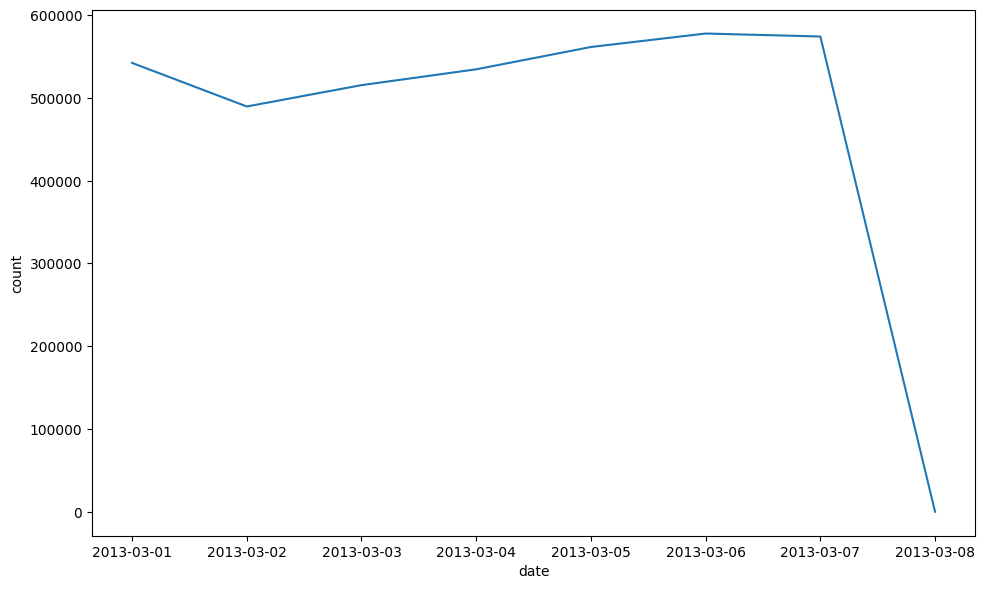

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x= data.groupby('date').size().reset_index(name='count')['date'],y=data.groupby('date').size().reset_index(name='count')['count'])
plt.tight_layout()

The date "8th March 2013" has no significant count in our dataset.Let us see why?

In [ ]:
data['date']= pd.to_datetime(data['date'])
data['hour'][data['date']=='2013-03-08'].value_counts().reset_index()

,hour,count
0,0,16


So these are maybe due to cossing the buffer of time from 7th March, 2013 midnight. We can let this be in our dataset.

Let us proceed to make a Day-wise Trend for active users and similarly we will follow up for Hourly basis.

In [ ]:
#  day wise daily trend:

# Setting up correct order for days
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['day']=pd.Categorical(data['day'],categories=order_days,ordered= True)

# grouping the counts based on day type
data_day = data['day'].value_counts().reset_index(name='count').sort_values('day')
data_day

,day,count
4,Monday,534595
2,Tuesday,561561
0,Wednesday,577824
1,Thursday,574240
3,Friday,542368
6,Saturday,489705
5,Sunday,515465


<ipython-input-39-2ab2fb0193b1>:2: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.barplot(x=data_day['day'], y= data_day['count'], data=data_day, palette = duolingo_colors, hue = data_day['day'])


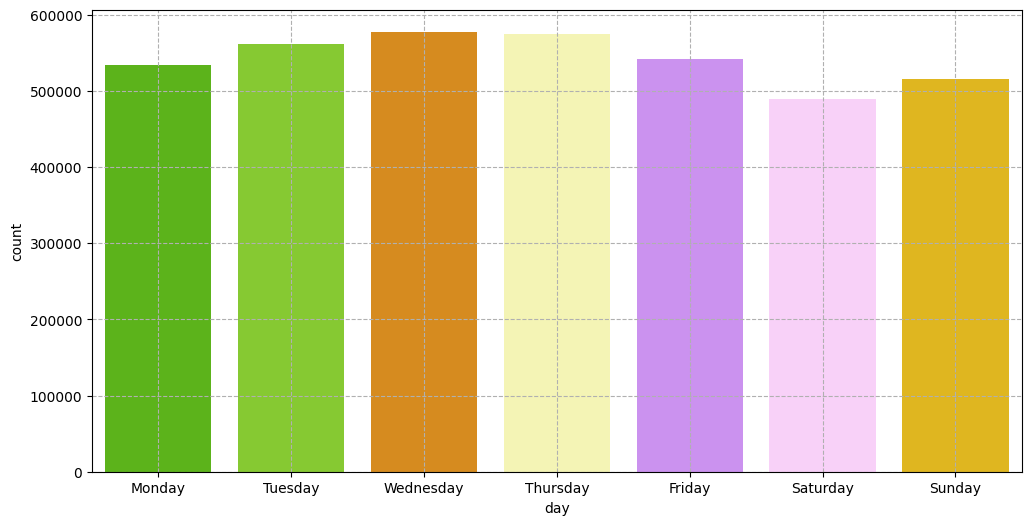

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=data_day['day'], y= data_day['count'], data=data_day, palette = duolingo_colors, hue = data_day['day'])

plt.grid(linestyle='--')

In [ ]:
data['hour'].value_counts().reset_index(name= 'counts').sort_values('hour')

,hour,counts
9,0,188715
8,1,189609
10,2,188554
12,3,172621
14,4,145875
17,5,111427
20,6,80684
22,7,75318
23,8,69965
21,9,76519


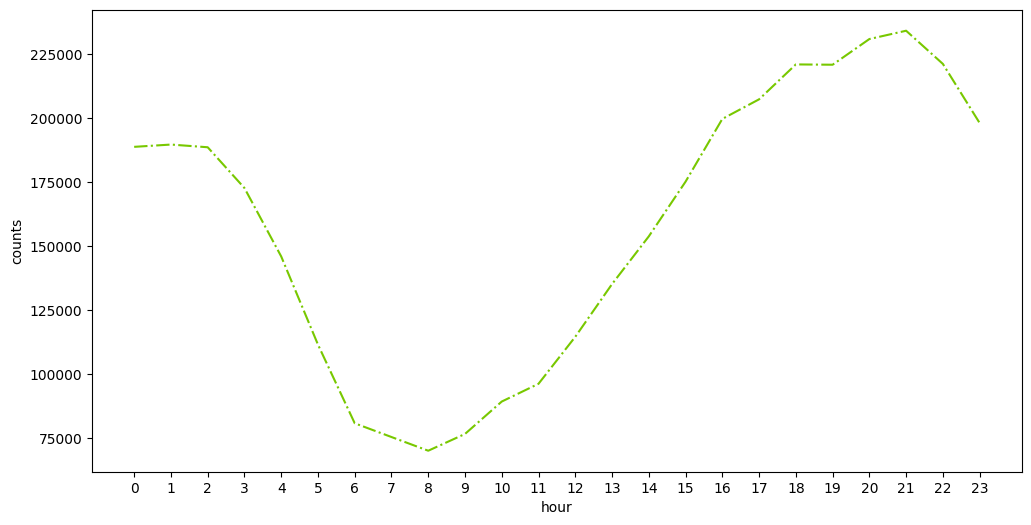

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x= data['hour'].value_counts().reset_index(name= 'counts').sort_values('hour')['hour'], y =data['hour'].value_counts().reset_index(name= 'counts').sort_values('hour')['counts'], linestyle='dashdot', color =  '#78C800', markers = True)

plt.xticks(np.arange(0,24,1))
plt.show()

In [ ]:
pd.crosstab(index= data['hour'],columns= data['day'])

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,24184,28778,28393,26971,30542,25434,24413
1,25307,28384,30341,28813,30340,23517,22907
2,23105,29244,29541,31711,29621,24224,21108
3,23046,27995,26922,26364,26465,21876,19953
4,19984,22536,23589,22341,19822,19074,18529
5,15653,18019,17157,16963,16211,13674,13750
6,10453,12363,12771,12106,12368,10256,10367
7,9927,10958,11697,10892,10817,9791,11236
8,10565,11382,9786,10678,9677,8910,8967


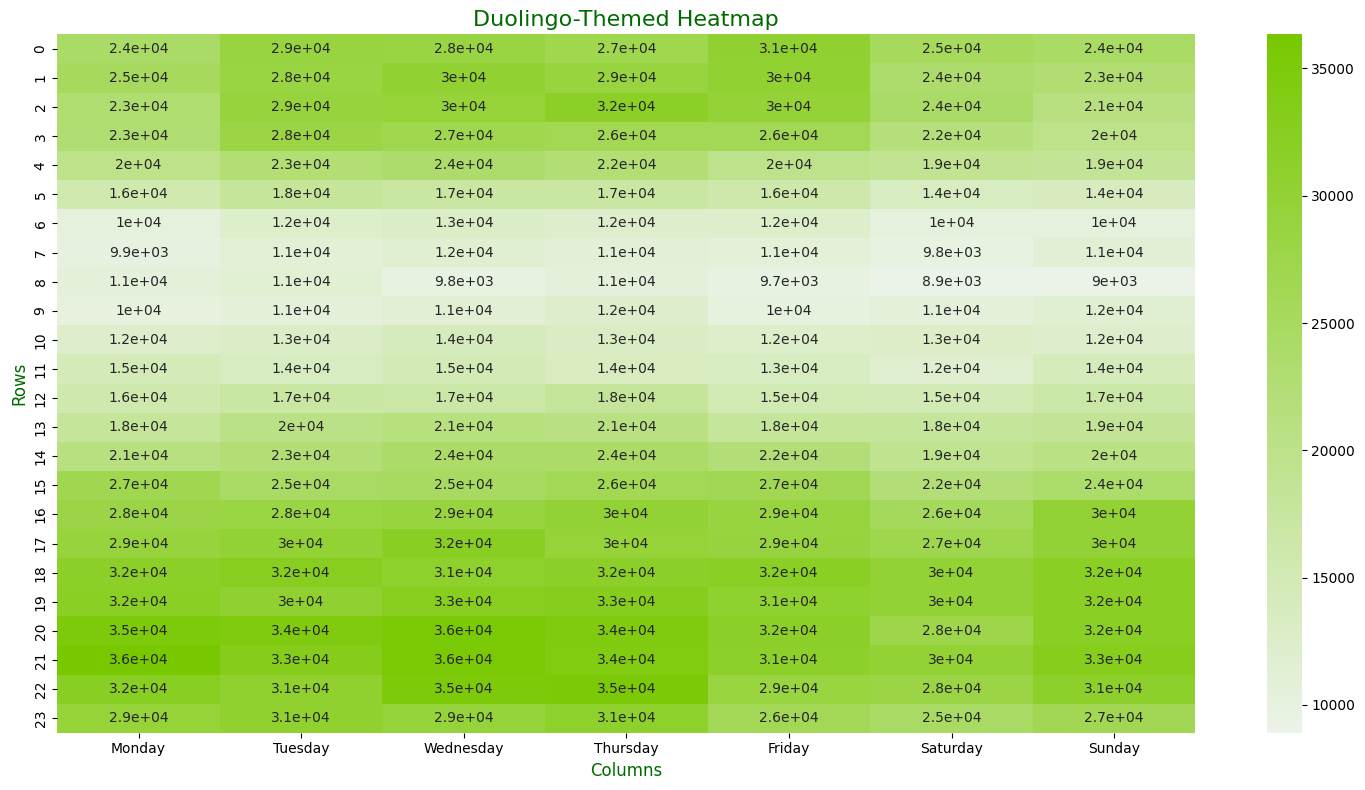

In [ ]:
plt.figure(figsize=(15,8))
duolingo_palette = sns.light_palette("#78C800", as_cmap=True)
sns.heatmap(pd.crosstab(index= data['hour'],columns= data['day']),cmap = duolingo_palette,annot=True)

plt.title("Duolingo-Themed Heatmap", fontsize=16, color="#006C00")  # Darker green for title
plt.xlabel("Columns", fontsize=12, color="#006C00")
plt.ylabel("Rows", fontsize=12, color="#006C00")
plt.tight_layout()
plt.show()

### Analysis on Lexeme String Types

Let us have a look at how the diversity of string type looks like.

In [ ]:
lex_data = data['lexeme_type'].value_counts().reset_index(name='counts')
lex_data

,lexeme_type,counts
0,n,1546743
1,vblex,627913
2,det,396580
3,prn,308519
4,adj,195514
5,vbser,160889
6,adv,137079
7,*sf,124042
8,pr,117027
9,cnjcoo,46120


<ipython-input-45-cf0aeef973b8>:5: UserWarning: The palette list has more values (35) than needed (30), which may not be intended.
  sns.barplot(x=lex_data['counts'], y=lex_data['lexeme_type'], data=lex_data, hue =lex_data['lexeme_type'],palette = duolingo_palette)


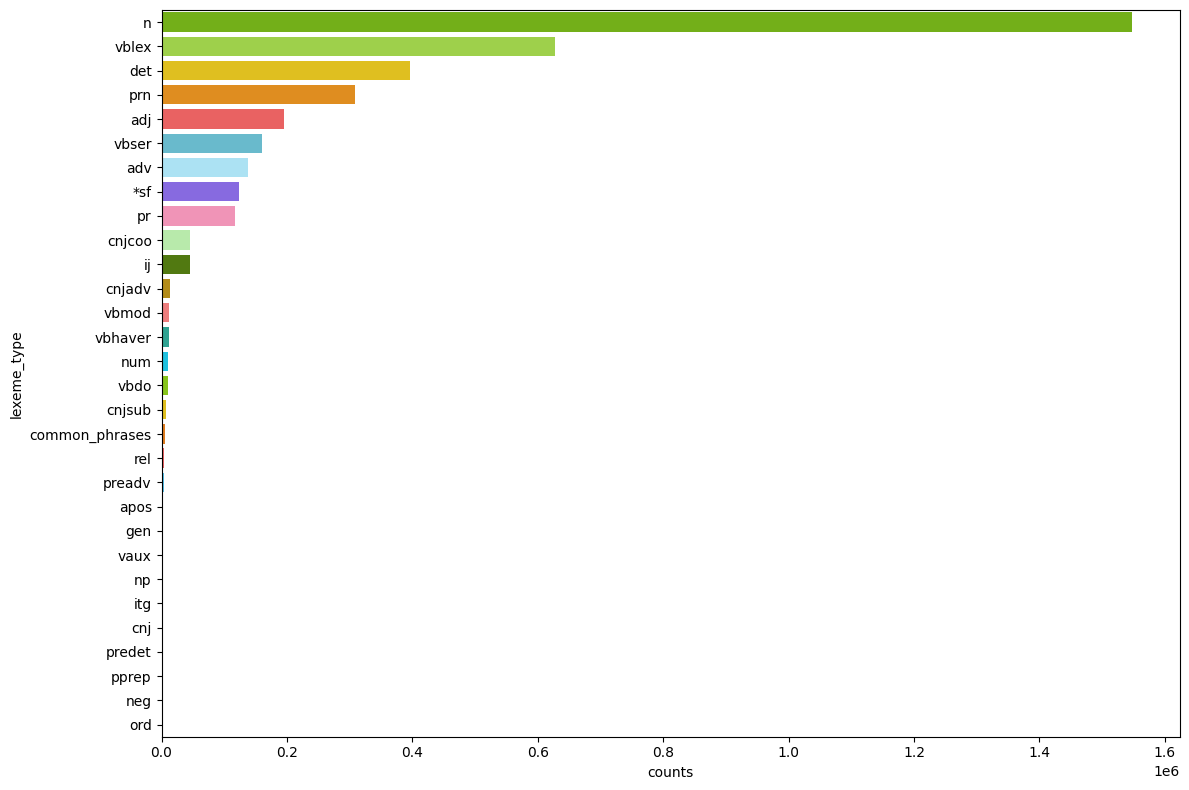

In [ ]:
duolingo_palette = ["#78C800", "#A3E635", "#FFD400", "#FF9100", "#FF4C4C", "#58C4DD", "#A0E8FF", "#7D56F4", "#FF85B3", "#B2F5A0", "#558A00", "#CC9900", "#FF6B6B", "#1DB6A0", "#00D7FF", "#8EE000", "#FFD400", "#FF7C00", "#FF4C4C", "#3AC9FF", "#7D56F4", "#FF8FB1", "#FF4C4C", "#78C800", "#1DB6A0", "#A5D578", "#FFE97F", "#FFB070", "#B3E5F7", "#D3C1F9", "#F0F0F0", "#B0B0B0", "#707070", "#3B3B3B", "#FFFFFF"]


plt.figure(figsize=(12,8))
sns.barplot(x=lex_data['counts'], y=lex_data['lexeme_type'], data=lex_data, hue =lex_data['lexeme_type'],palette = duolingo_palette)
plt.tight_layout()
plt.show()

TOP 5 Lexeme Types


In [ ]:

lex_data.head()

,lexeme_type,counts
0,n,1546743
1,vblex,627913
2,det,396580
3,prn,308519
4,adj,195514


<ipython-input-47-0fd9150ab5b4>:2: UserWarning: The palette list has more values (35) than needed (5), which may not be intended.
  sns.barplot(x=lex_data.head()['counts'], y=lex_data.head()['lexeme_type'], data=lex_data.head(), hue =lex_data.head()['lexeme_type'],palette = duolingo_palette)


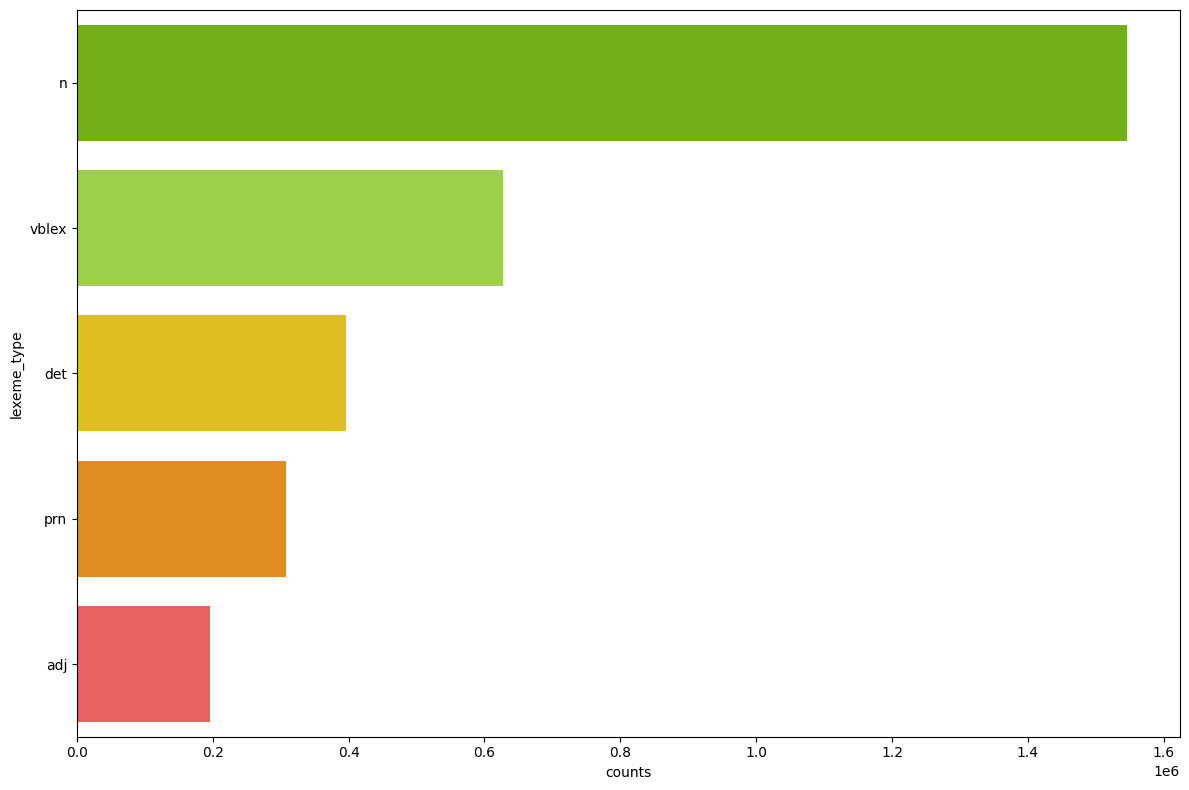

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=lex_data.head()['counts'], y=lex_data.head()['lexeme_type'], data=lex_data.head(), hue =lex_data.head()['lexeme_type'],palette = duolingo_palette)
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,...,date,time,day,hour,history_perc,session_perc,Growth,Growth_cat,performance_cat,lexeme_type
0,1.0,1825254,5C7,fr,en,3712581f1a9fbc0894e22664992663e9,sur/sur<pr>,2,1,2,...,2013-03-03,17:13:47,Sunday,17,50.00,100.0,50.00,Medium,High,pr
1,1.0,367,fWSx,en,es,0371d118c042c6b44ababe667bed2760,police/police<n><pl>,6,5,2,...,2013-03-04,18:30:50,Monday,18,83.33,100.0,16.67,Low,High,n
2,0.0,1329,hL-s,de,en,5fa1f0fcc3b5d93b8617169e59884367,hat/haben<vbhaver><pri><p3><sg>,10,10,1,...,2013-03-03,18:35:44,Sunday,18,100.00,0.0,-100.00,Negative,Low,vbhaver
3,1.0,156,h2_R,es,en,4d77de913dc3d65f1c9fac9d1c349684,en/en<pr>,111,99,4,...,2013-03-07,17:56:03,Thursday,17,89.19,100.0,10.81,Low,High,pr
4,1.0,257,eON,es,en,35f14d06d95a34607d6abb0e52fc6d2b,caballo/caballo<n><m><sg>,3,3,3,...,2013-03-05,21:41:22,Tuesday,21,100.00,100.0,0.00,Low,High,n


In [ ]:
data['user_id'].value_counts().head(10)

,count
user_id,
bcH_,4202
h8n2,2527
cpBu,2417
ht1n,2396
g2Ev,2383
iKG9,2318
gWfj,2219
ia1J,2138
NPs,2083


In [ ]:
top10= data['user_id'].value_counts().head(10).index
top10

Index(['bcH_', 'h8n2', 'cpBu', 'ht1n', 'g2Ev', 'iKG9', 'gWfj', 'ia1J', 'NPs',
       'ilJW'],
      dtype='object', name='user_id')

In [ ]:
top10data = data[data['user_id'].isin(top10)]
top10data

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,...,date,time,day,hour,history_perc,session_perc,Growth,Growth_cat,performance_cat,lexeme_type
148,1.0,63428,iKG9,es,en,022a6054cf91fa919945bb5d6a95c181,gris/gris<adj><mf><sg>,9,8,1,...,2013-03-03,16:26:19,Sunday,16,88.89,100.0,11.11,Low,High,adj
311,1.0,6394,gWfj,en,es,4adf5cd40d521b02a9cc241bf3adc6bb,have/have<vblex><inf>,205,177,1,...,2013-03-05,00:11:36,Tuesday,0,86.34,100.0,13.66,Low,High,vblex
422,0.0,327,ht1n,en,es,e296b8e7737593b36ec7583275c790fe,boys/boy<n><pl>,124,115,1,...,2013-03-01,15:27:54,Friday,15,92.74,0.0,-92.74,Negative,Low,n
992,0.0,95,bcH_,en,es,a617ed646a251e339738ce62b84e61ce,are/be<vbser><pres>,2142,1520,1,...,2013-03-06,00:01:00,Wednesday,0,70.96,0.0,-70.96,Negative,Low,vbser
1322,1.0,289,bcH_,en,es,7489751fe9a37e9c8f03e2e4562b8d03,in/in<pr>,1805,1191,1,...,2013-03-06,00:33:01,Wednesday,0,65.98,100.0,34.02,Medium,High,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794867,1.0,151,ilJW,fr,en,631d297c324518ea97ac01fd2abd6e46,les/le<det><def><mf><pl>,311,286,1,...,2013-03-07,06:18:13,Thursday,6,91.96,100.0,8.04,Low,High,det
3795117,1.0,198,ilJW,fr,en,b1e18ed8c315790bee5862b9cd0ba83d,ça/ça<prn><tn><nt>,78,71,1,...,2013-03-05,01:59:29,Tuesday,1,91.03,100.0,8.97,Low,High,prn
3795201,1.0,1472437,g2Ev,en,es,c2931f12f84e49c84d224cbbdc8a504b,cats/cat<n><pl>,3,3,1,...,2013-03-03,19:41:02,Sunday,19,100.00,100.0,0.00,Low,High,n
3795280,1.0,163,iKG9,es,en,e90f0f43da00a10f3954bcd34c144e2c,queso/queso<n><m><sg>,6,6,5,...,2013-03-01,23:52:26,Friday,23,100.00,100.0,0.00,Low,High,n


In [ ]:
pd.crosstab(top10data['user_id'],top10data['day'])

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_id,,,,,,,
NPs,303,245,314,276,353,357,235
bcH_,582,788,772,642,197,463,758
cpBu,382,381,455,358,325,350,166
g2Ev,287,459,337,325,270,370,335
gWfj,397,499,22,177,393,320,411
h8n2,122,269,401,77,445,578,635
ht1n,384,564,539,144,455,0,310
iKG9,459,550,103,389,75,358,384
ia1J,191,135,90,441,973,172,136


In [ ]:
pd.crosstab(top10data['hour'],top10data['user_id'])

user_id,NPs,bcH_,cpBu,g2Ev,gWfj,h8n2,ht1n,iKG9,ia1J,ilJW
hour,,,,,,,,,,
0,0,392,0,167,319,0,0,179,0,3
1,0,0,2,0,355,0,0,51,0,107
2,0,0,619,0,130,0,0,16,0,71
3,0,289,1445,0,0,0,0,34,0,155
4,0,1606,351,0,0,0,0,0,0,48
5,0,1683,0,0,0,290,0,0,0,168
6,0,0,0,0,0,239,0,0,0,272
7,0,0,0,0,0,305,102,0,0,33
8,0,0,0,0,0,70,79,0,84,0


In [ ]:
data.lexeme_type.unique()

array(['pr', 'n', 'vbhaver', 'prn', 'det', 'vblex', '*sf', 'vbdo',
       'vbser', 'adv', 'adj', 'ij', 'cnjcoo', 'rel', 'num', 'np',
       'cnjadv', 'vbmod', 'preadv', 'cnjsub', 'common_phrases', 'vaux',
       'cnj', 'gen', 'apos', 'itg', 'predet', 'pprep', 'neg', 'ord'],
      dtype=object)

In [ ]:
# Define the mapping dictionary for lexeme types to their buckets
lexeme_buckets = {
    # Pronouns and Related
    'pr': 'Pronouns/Related', 'prn': 'Pronouns/Related', 'preadv': 'Pronouns/Related',
    'predet': 'Pronouns/Related', 'np': 'Pronouns/Related', 'rel': 'Pronouns/Related',

    # Verbs
    'vbhaver': 'Verbs', 'vbdo': 'Verbs', 'vbser': 'Verbs', 'vblex': 'Verbs',
    'vbmod': 'Verbs', 'vaux': 'Verbs', 'ord': 'Verbs',

    # Nouns
    'n': 'Nouns', 'gen': 'Nouns', 'apos': 'Nouns',

    # Determiners and Adjectives
    'det': 'Determiners/Adjectives', 'adj': 'Determiners/Adjectives',
    'predet': 'Determiners/Adjectives',

    # Adverbs
    'adv': 'Adverbs',

    # Interjections
    'ij': 'Interjections',

    # Conjunctions
    'cnjcoo': 'Conjunctions', 'cnjadv': 'Conjunctions', 'cnjsub': 'Conjunctions',

    # Numbers and Quantifiers
    'num': 'Numbers/Quantifiers', 'ord': 'Numbers/Quantifiers',

    # Negation
    'neg': 'Negation',

    # Specific or Common Phrases
    'common_phrases': 'Specific/Common Phrases', 'itg': 'Specific/Common Phrases',

    # Other
    'pprep': 'Other', 'apos': 'Other'
}

In [ ]:
data['lexeme_bucket'] = data['lexeme_type'].map(lexeme_buckets)
data.head()

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,...,time,day,hour,history_perc,session_perc,Growth,Growth_cat,performance_cat,lexeme_type,lexeme_bucket
0,1.0,1825254,5C7,fr,en,3712581f1a9fbc0894e22664992663e9,sur/sur<pr>,2,1,2,...,17:13:47,Sunday,17,50.00,100.0,50.00,Medium,High,pr,Pronouns/Related
1,1.0,367,fWSx,en,es,0371d118c042c6b44ababe667bed2760,police/police<n><pl>,6,5,2,...,18:30:50,Monday,18,83.33,100.0,16.67,Low,High,n,Nouns
2,0.0,1329,hL-s,de,en,5fa1f0fcc3b5d93b8617169e59884367,hat/haben<vbhaver><pri><p3><sg>,10,10,1,...,18:35:44,Sunday,18,100.00,0.0,-100.00,Negative,Low,vbhaver,Verbs
3,1.0,156,h2_R,es,en,4d77de913dc3d65f1c9fac9d1c349684,en/en<pr>,111,99,4,...,17:56:03,Thursday,17,89.19,100.0,10.81,Low,High,pr,Pronouns/Related
4,1.0,257,eON,es,en,35f14d06d95a34607d6abb0e52fc6d2b,caballo/caballo<n><m><sg>,3,3,3,...,21:41:22,Tuesday,21,100.00,100.0,0.00,Low,High,n,Nouns


In [ ]:
data['lexeme_bucket'].nunique()

11

<ipython-input-58-3d96a52a9058>:2: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.countplot(y=data['lexeme_bucket'],hue= data['lexeme_bucket'], palette = duolingo_colors)


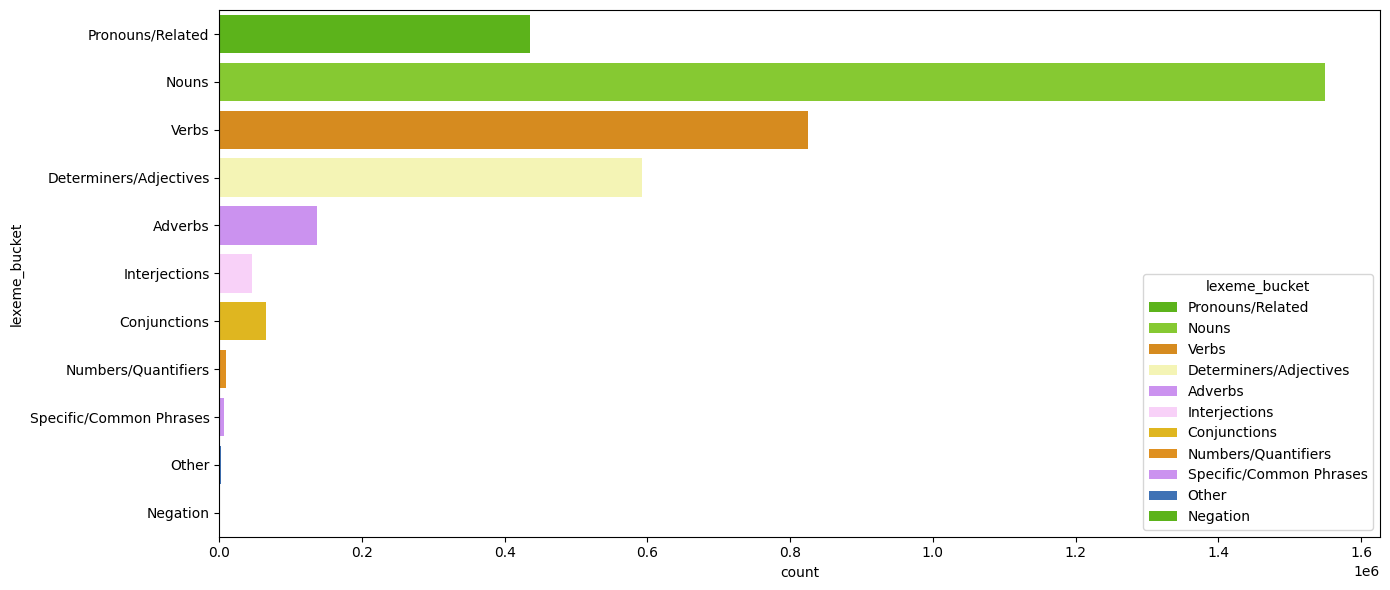

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(y=data['lexeme_bucket'],hue= data['lexeme_bucket'], palette = duolingo_colors)

plt.tight_layout()
plt.show()

### ***HYPOTHESIS 1***
**The harder the language is to learn, the lesser engaging it is for the users meaning more is the delta**

REASON: We are assuming that the language which is difficult to learn will be difficult to score as well, as getting low marks can be considered a reason for users to slack in their studies and that can lead to lesser engagement in app.

We are trying to check the average p_recall values for each language to see which in language users can struggling to score.

In [ ]:
# Average p_recall values for languages
avg_pr = data.groupby('learning_language')['p_recall'].mean().reset_index().sort_values('p_recall')
avg_pr

,learning_language,p_recall
3,fr,0.882760
0,de,0.892481
2,es,0.898846
1,en,0.898900
5,pt,0.903441
4,it,0.907549


<ipython-input-60-05616b105210>:2: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(x= avg_pr['learning_language'],y=avg_pr['p_recall'],data= avg_pr, hue= avg_pr['learning_language'],palette = duolingo_colors)


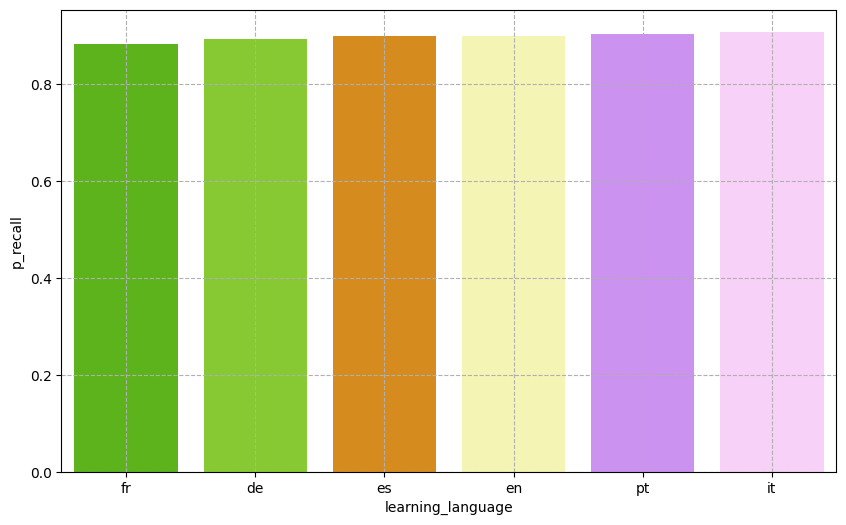

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x= avg_pr['learning_language'],y=avg_pr['p_recall'],data= avg_pr, hue= avg_pr['learning_language'],palette = duolingo_colors)
plt.grid(linestyle='--')

From the looks of it, Languages like **fr, de and es seems to be more difficult** to learn than the rest of it.

Now let us check up on the mean of delta along side with the languages.

In [ ]:
# Average delta values for languages
avg_dlt= data.groupby('learning_language')['delta'].mean().reset_index().sort_values('delta')
avg_dlt

,learning_language,delta
4,it,315890.546434
5,pt,488871.482478
1,en,623683.766791
3,fr,695486.494281
2,es,843162.664675
0,de,941970.073516


<ipython-input-62-46d35351c185>:2: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(x= avg_dlt['learning_language'],y=avg_dlt['delta'],data= avg_dlt, hue= avg_dlt['learning_language'],palette = duolingo_colors)


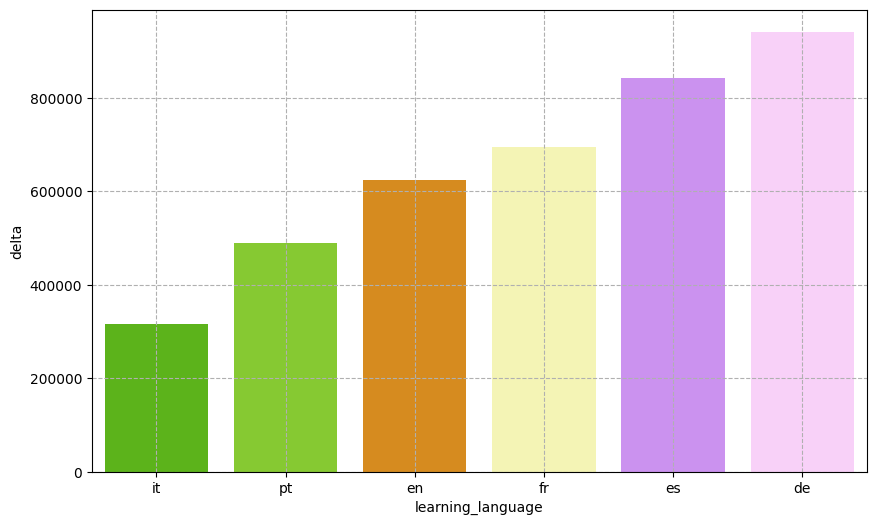

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x= avg_dlt['learning_language'],y=avg_dlt['delta'],data= avg_dlt, hue= avg_dlt['learning_language'],palette = duolingo_colors)
plt.grid(linestyle='--')

Since we have sorted the results in ascending order, we have the list of languages with most engaging on the top and the least engaging at the bottom.

Languages like fr, es and de are the bottommost languages with highest delta.

***RESULT***: We can infer from this that the languages with lowest performance
 by users are also the ones with lowest engagements.

### ***HYPOTHESIS 2***

---

**More Lexeme to learn means lesser p_recall values for user_ids**

REASON: If any user encounters more lexemes in the sessions it might get difficult for the users to maintain the p_recall values on a higher end.

In [ ]:
# Group by user_id to calculate number of lexemes and average p_recall for each user
user_summary = data.groupby('user_id').agg( num_lexemes=('lexeme_id', 'nunique'), user_avg_p_recall=('p_recall', 'mean')).reset_index()

# Create lexeme_count_category column based on num_lexemes
bins = [0, 100, 200, 300, 400, 500, 600, 700, float('inf')]
labels = ['Up to 100', 'Up to 200', 'Up to 300', 'Up to 400', 'Up to 500', 'Up to 600', 'Up to 700', 'Above 700']
user_summary['lexeme_count_category'] = pd.cut(user_summary['num_lexemes'], bins=bins, labels=labels, right=True)

# Group by lexeme_count_category to calculate no of users and avg_p_recall
lexeme_category_summary = user_summary.groupby('lexeme_count_category').agg(num_users=('user_id', 'count'), avg_p_recall=('user_avg_p_recall', 'mean')).reset_index()

# Rename columns for clarity
lexeme_category_summary.columns = ['no_of_lexemes', 'no_of_users', 'avg_p_recall']

# Display the final table
lexeme_category_summary


<ipython-input-63-28303ebb375e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lexeme_category_summary = user_summary.groupby('lexeme_count_category').agg(num_users=('user_id', 'count'), avg_p_recall=('user_avg_p_recall', 'mean')).reset_index()


,no_of_lexemes,no_of_users,avg_p_recall
0,Up to 100,75246,0.894610
1,Up to 200,3564,0.895554
2,Up to 300,584,0.889521
3,Up to 400,174,0.882190
4,Up to 500,68,0.863435
5,Up to 600,28,0.837791
6,Up to 700,10,0.860115
7,Above 700,20,0.864340


So, as we can see the tabular format of lexeme numbers and user counts with their average p_reall values.

Let us go ahead and try to plot a bar plot of user counts for different bins for lexeme counts. And a line plot for the average p_recall so check if we can find any relation in these parameters.

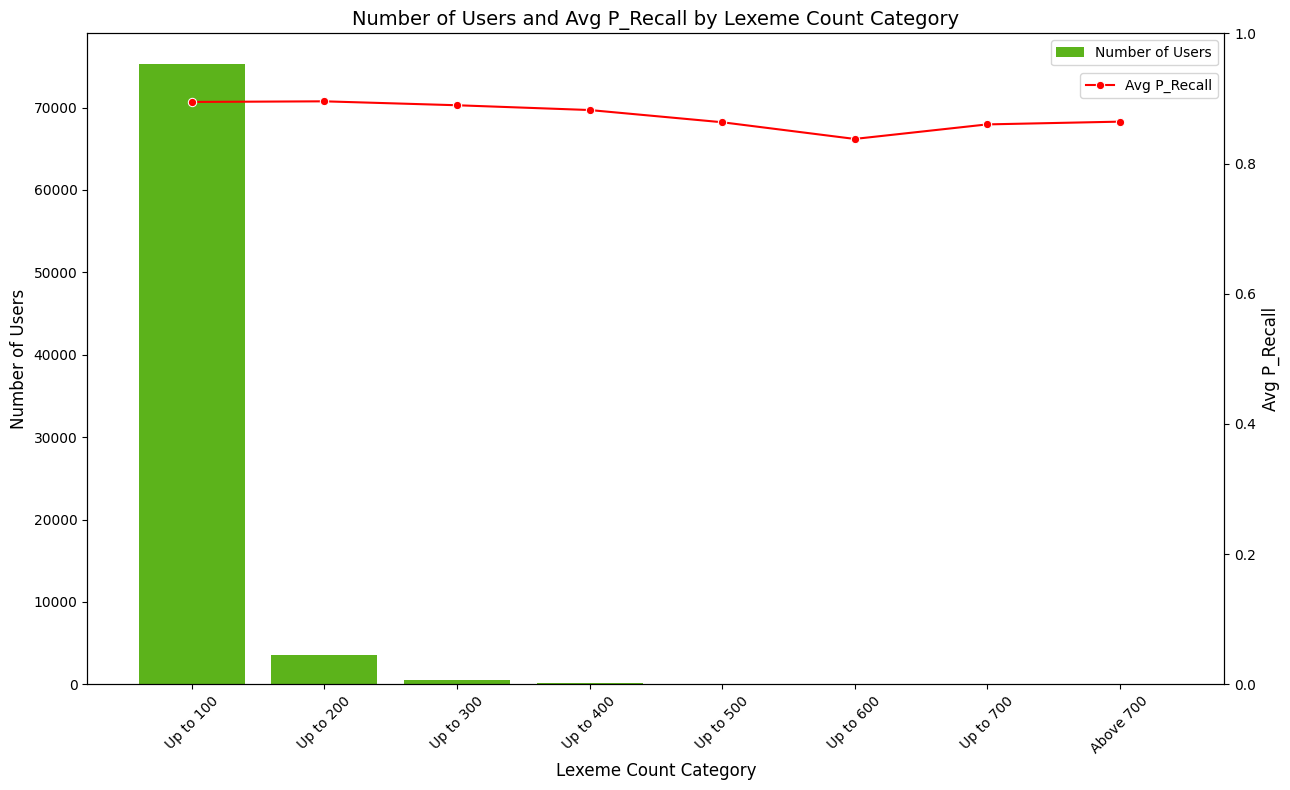

In [ ]:
# Plot figure setup
fig, ax1 = plt.subplots(figsize=(13, 8))

# Bar plot for the number of users
sns.barplot(x='no_of_lexemes', y='no_of_users', data=lexeme_category_summary, ax=ax1, color=duolingo_colors[0], label='Number of Users')

# Configure y-axis for the bar plot
ax1.set_ylabel('Number of Users', fontsize=12)
ax1.set_xlabel('Lexeme Count Category', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Number of Users and Avg P_Recall by Lexeme Count Category', fontsize=14)

# Create a secondary y-axis for the average p_recall
ax2 = ax1.twinx()
sns.lineplot(
    x='no_of_lexemes',
    y='avg_p_recall',
    data=lexeme_category_summary,
    marker='o',
    color='red',
    ax=ax2,
    label='Avg P_Recall'
)

# Configure y-axis for the line plot
ax2.set_ylabel('Avg P_Recall', fontsize=12)
ax2.set_ylim(0, 1)  # Assuming P_Recall values range from 0 to 1

# Add a legend
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

# Show the plot
plt.tight_layout()
plt.show()


As we can see the average p_recall is barely any different for different bins for lexeme count and the stark difference in user counts for different lexeme bins.

***RESULTS:*** It is safe to say that the hypothesis doesnot hold true as the average p_recall is not higher for more lexeme learners on the contrary it is lower suggesting the more lexemes the lesser p_recall of users.

### ***HYPOTHESIS 3***

---

**Users logging into Duolingo on Saturdays and Sundays might be very hardworking** **and might be scoring good in performance wise.**

REASON: Since Weekends are generally considered the free time and holidays for most people, People who are logging into the app must be putting in more efforts and hours to learn the language. Hence they might be scoring better than rest.

In [ ]:
# Avg p_recall for weekend
weekend_data = data[data['day'].isin(['Saturday','Sunday'])]

# Rounding up to 5 decimals
weekend_data['p_recall'].mean().round(5)

0.89656

In [ ]:
# Avg p_recall for weekdays
weekday_data = data[~data['day'].isin(['Saturday','Sunday'])]

# Rounding up to 5 decimals
weekday_data['p_recall'].mean().round(5)

0.89644

So the average p_recall for both Weekend and Weekday is almost the same :
Weekend avg = 0.89656
Weekday avg = 0.89644

Let us show the scenario over bar plot:

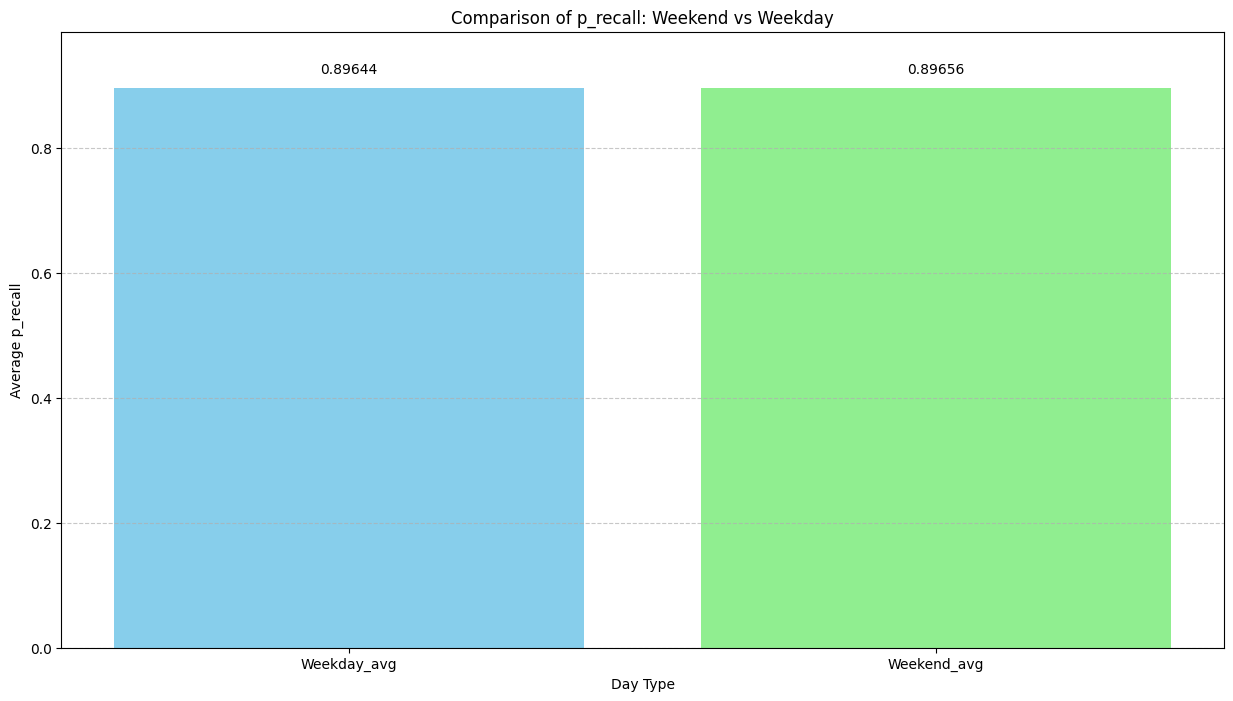

In [ ]:
plt.figure(figsize=(15, 8))

# Data for the bars
x_labels = ['Weekday_avg', 'Weekend_avg']
y_values = [weekday_data['p_recall'].mean().round(5), weekend_data['p_recall'].mean().round(5)]

# Creating the bar plot
plt.bar(x_labels, y_values, color=['skyblue', 'lightgreen'])

# Adding values on top of the bars
for i, value in enumerate(y_values):
    plt.text(i, value + (max(y_values) * 0.02),  # Slightly above the bar
             f'{value:.5f}',
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')

# Customizing the plot
plt.title('Comparison of p_recall: Weekend vs Weekday')
plt.ylabel('Average p_recall')
plt.xlabel('Day Type')
plt.ylim(0, max(y_values) + max(y_values) * 0.1)  # Dynamic adjustment of y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Both Weekend and Weekday have same average and no conclusion can be made out of this.

***RESULTS***: HYPOTHESIS is wrong and average for all the days are almost same

In [ ]:
"""
# Data for the bars
x_labels = ['Weekday_avg', 'Weekend_avg']
y_values = [weekday_data['p_recall'].mean().round(5), weekend_data['p_recall'].mean().round(5)]

# Creating the bar plot
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(x_labels, y_values, color=['skyblue', 'lightgreen'])

# Adding values on top of the bars
ax.bar_label(bars, fmt='%.5f', label_type='edge', padding=5)

# Customizing the plot
ax.set_title('Comparison of p_recall: Weekend vs Weekday')
ax.set_ylabel('Average p_recall')
ax.set_xlabel('Day Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
"""

"\n# Data for the bars\nx_labels = ['Weekday_avg', 'Weekend_avg']\ny_values = [weekday_data['p_recall'].mean().round(5), weekend_data['p_recall'].mean().round(5)]\n\n# Creating the bar plot\nfig, ax = plt.subplots(figsize=(15, 8))\nbars = ax.bar(x_labels, y_values, color=['skyblue', 'lightgreen'])\n\n# Adding values on top of the bars\nax.bar_label(bars, fmt='%.5f', label_type='edge', padding=5)\n\n# Customizing the plot\nax.set_title('Comparison of p_recall: Weekend vs Weekday')\nax.set_ylabel('Average p_recall')\nax.set_xlabel('Day Type')\nax.grid(axis='y', linestyle='--', alpha=0.7)\n\n# Show the plot\nplt.show()\n"

### ***HYPOTHESIS 4***

---

**Users with higher history_seen numbers will have higher p_recall values too due** **to more practice**

REASON: Since the users have higher history seen values we can assume that they might have more dedicatedly worked on th sessions and might have been better students in general with higher p_recall values.

In [ ]:
# Let's check the range of the unique values for the history seen
data['history_seen'].unique()

array([   2,    6,   10, ..., 4786, 2312, 3517])

In [ ]:
# Assuming 'data' is the dataframe containing your dataset
# Step 1: Calculate the average p_recall for each unique user_id
user_avg_recall = data.groupby('user_id').agg({ 'history_seen': 'mean', 'p_recall': 'mean'}).reset_index()

# Step 2: Get the top 200 and bottom 200 users based on history_seen
top_200_users = user_avg_recall.nlargest(200, 'history_seen')  # Top 200 users
bottom_200_users = user_avg_recall.nsmallest(200, 'history_seen')  # Bottom 200 users

In [ ]:
# Combine both top and bottom 200 users for comparison
top_200_users['user_group'] = 'Top 200 Users'
bottom_200_users['user_group'] = 'Bottom 200 Users'

#combined dataset from above two
combined_data = pd.concat([top_200_users, bottom_200_users])


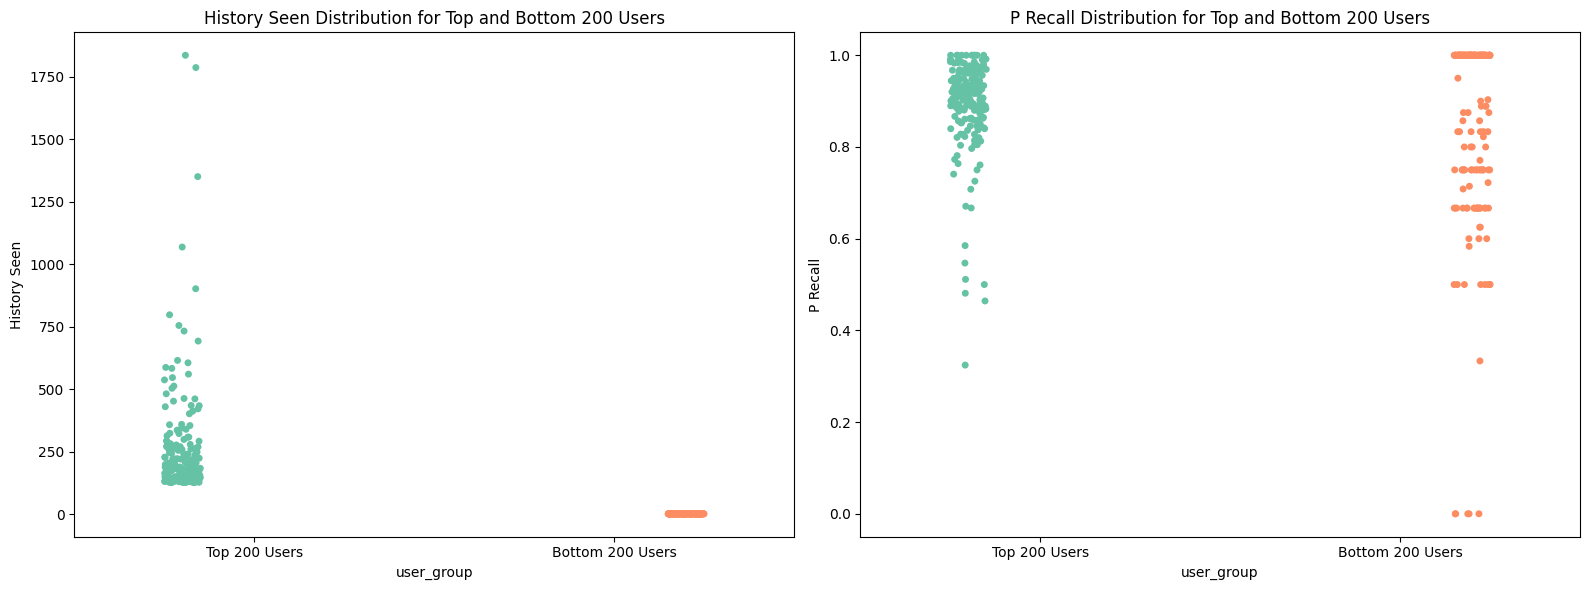

In [ ]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot strip plot for history_seen with 'user_group' as hue on the first axis
sns.stripplot(x='user_group', y='history_seen', data=combined_data, jitter=True, hue='user_group', palette='Set2', dodge=True, ax=axes[0])
axes[0].set_title('History Seen Distribution for Top and Bottom 200 Users')
axes[0].set_ylabel('History Seen')

# Plot strip plot for p_recall with 'user_group' as hue on the second axis
sns.stripplot(x='user_group', y='p_recall', data=combined_data, jitter=True, hue='user_group', palette='Set2', dodge=True, ax=axes[1])
axes[1].set_title('P Recall Distribution for Top and Bottom 200 Users')
axes[1].set_ylabel('P Recall')

# Display the plots
plt.tight_layout()
plt.show()


***RESULTS -***The hypothesis is supported. Users with higher history_seen values tend to have higher recall accuracy (p_recall)

### ***HYPOTHESIS 5***

---

**Users will be more active on Weekends rather than Weekdays due to lack of other** **activities**

REASON : Login counts should be more on sundays and saturdays due to more free time on hand on users


  day_type  avg_login_count
0  Weekday        41.635653
1  Weekend        32.026063


<ipython-input-73-a94d68a49269>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='avg_login_count', data=avg_login_counts, palette='Set2')


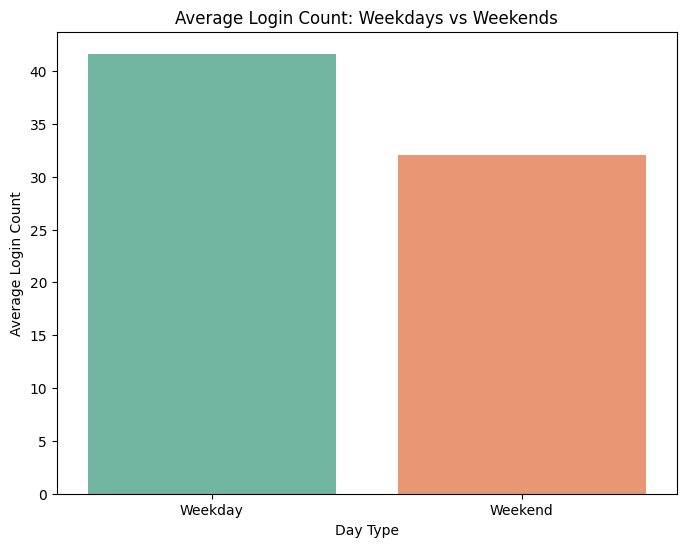

Average logins on Weekdays: 41.64
Average logins on Weekends: 32.03


In [ ]:
# Step 1: Create a 'day_type' column to classify weekdays and weekends
data['day_type'] = data['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Step 2: Count the number of logins for each user for each day
login_counts_per_user_per_day = data.groupby(['user_id', 'day_type']).size().reset_index(name='login_count')

# Step 3: Group by 'day_type' and calculate the average login count
avg_login_counts = login_counts_per_user_per_day.groupby('day_type')['login_count'].mean().reset_index(name='avg_login_count')

# Step 4: Print the avg_login_counts to verify
print(avg_login_counts)

# Step 5: Plot the comparison between weekdays and weekends
plt.figure(figsize=(8, 6))
sns.barplot(x='day_type', y='avg_login_count', data=avg_login_counts, palette='Set2')
plt.title('Average Login Count: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Login Count')
plt.show()

# Print the average login counts for weekdays and weekends
print(f"Average logins on Weekdays: {avg_login_counts[avg_login_counts['day_type'] == 'Weekday']['avg_login_count'].values[0]:.2f}")
print(f"Average logins on Weekends: {avg_login_counts[avg_login_counts['day_type'] == 'Weekend']['avg_login_count'].values[0]:.2f}")


Users are more active on weekdays compared to weekends, as the average login count is significantly higher on weekdays.

**RESULT**;-The hypothesis that users are more active on weekends due to free time is not supported. This suggests that users may prioritize learning activities during weekdays, possibly aligning with their structured routines.

### ***HYPOTHESIS 6***

---

**Basic word types in a sentences like nouns and verbs should be easier to learn and will have higher p_recall values and so Complex word types in a sentences like negattions, conjunctions and Interjections are associated with lower p_recall values**

REASON: Word types like Interjections (exclamations), Nouns and Verbs should be easier to learn as they are very simple to learn compared to Conjunctions and Negations. So users might be having higher p_recall for basic types and lower for complex types.

<ipython-input-74-e3623ccf407c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lexeme_bucket', y='p_recall', data=lexeme_avg, palette=duolingo_colors)
<ipython-input-74-e3623ccf407c>:9: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(x='lexeme_bucket', y='p_recall', data=lexeme_avg, palette=duolingo_colors)


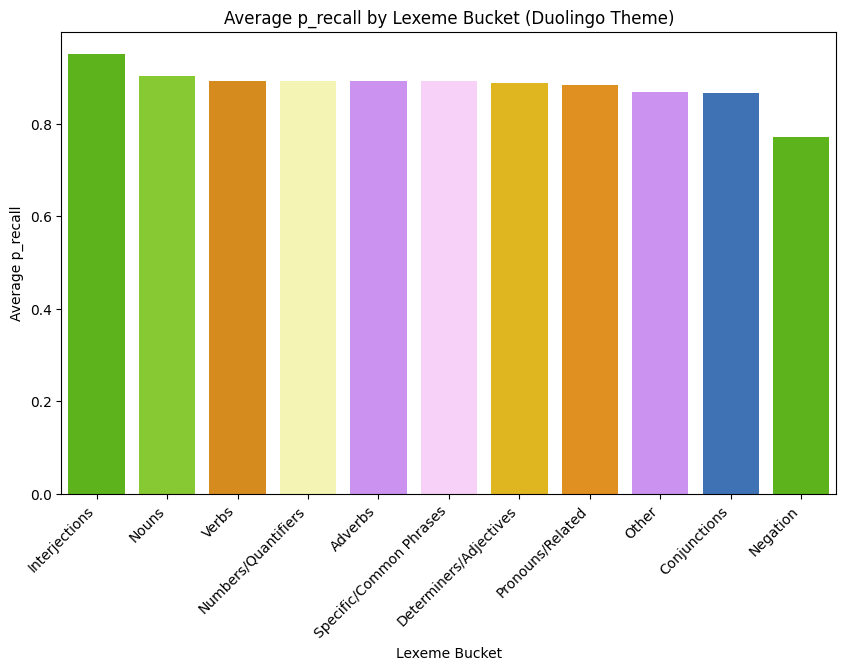

In [ ]:
# Calculate the average p_recall for each lexeme_bucket
lexeme_avg = data.groupby('lexeme_bucket')['p_recall'].mean().reset_index()

# Sort by p_recall for better visualization
lexeme_avg = lexeme_avg.sort_values(by='p_recall', ascending=False)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='lexeme_bucket', y='p_recall', data=lexeme_avg, palette=duolingo_colors)
plt.title('Average p_recall by Lexeme Bucket (Duolingo Theme)')
plt.xlabel('Lexeme Bucket')
plt.ylabel('Average p_recall')
plt.xticks(rotation=45, ha='right')
plt.show()


# Customised Week in Review for most active user

In [ ]:
# Filter out the dataset just for the most active user
most_active_data = data[data['user_id']=='bcH_']
most_active_data.nunique()

,0
p_recall,14
delta,1820
user_id,1
learning_language,1
ui_language,1
lexeme_id,629
lexeme_string,629
history_seen,1788
history_correct,1211
session_seen,8


In [ ]:
# Calculate required metrics
avg_p_recall = most_active_data['p_recall'].mean()
avg_delta = most_active_data['delta'].mean()
total_logins = len(most_active_data)
languages_learning = most_active_data['learning_language'].unique()
unique_lexeme_ids = most_active_data['lexeme_id'].nunique()

# Find most and least active day and hour
most_active_day = most_active_data['day'].value_counts().idxmax()
least_active_day = most_active_data['day'].value_counts().idxmin()
most_active_hour = most_active_data['hour'].value_counts().idxmax()
least_active_hour = most_active_data['hour'].value_counts().idxmin()

# Combine results into a dictionary
user_summary = {
    "Average p_recall": avg_p_recall,
    "Average delta": avg_delta,
    "Total logins": total_logins,
    "Languages learning": list(languages_learning),
    "Unique lexeme_ids learned": unique_lexeme_ids,
    "Most active day": most_active_day,
    "Least active day": least_active_day,
    "Most active hour": most_active_hour,
    "Least active hour": least_active_hour
}

# Display results
user_summary


{'Average p_recall': 0.4641784335501616,
 'Average delta': 86379.82294145646,
 'Total logins': 4202,
 'Languages learning': ['en'],
 'Unique lexeme_ids learned': 629,
 'Most active day': 'Tuesday',
 'Least active day': 'Friday',
 'Most active hour': 5,
 'Least active hour': 23}

Some Pictorial representation of Most Active User's data

<ipython-input-77-8d31bcb8a3ea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette=duolingo_colors, ax=axes[0, 1])
<ipython-input-77-8d31bcb8a3ea>:20: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.barplot(x=day_counts.index, y=day_counts.values, palette=duolingo_colors, ax=axes[0, 1])


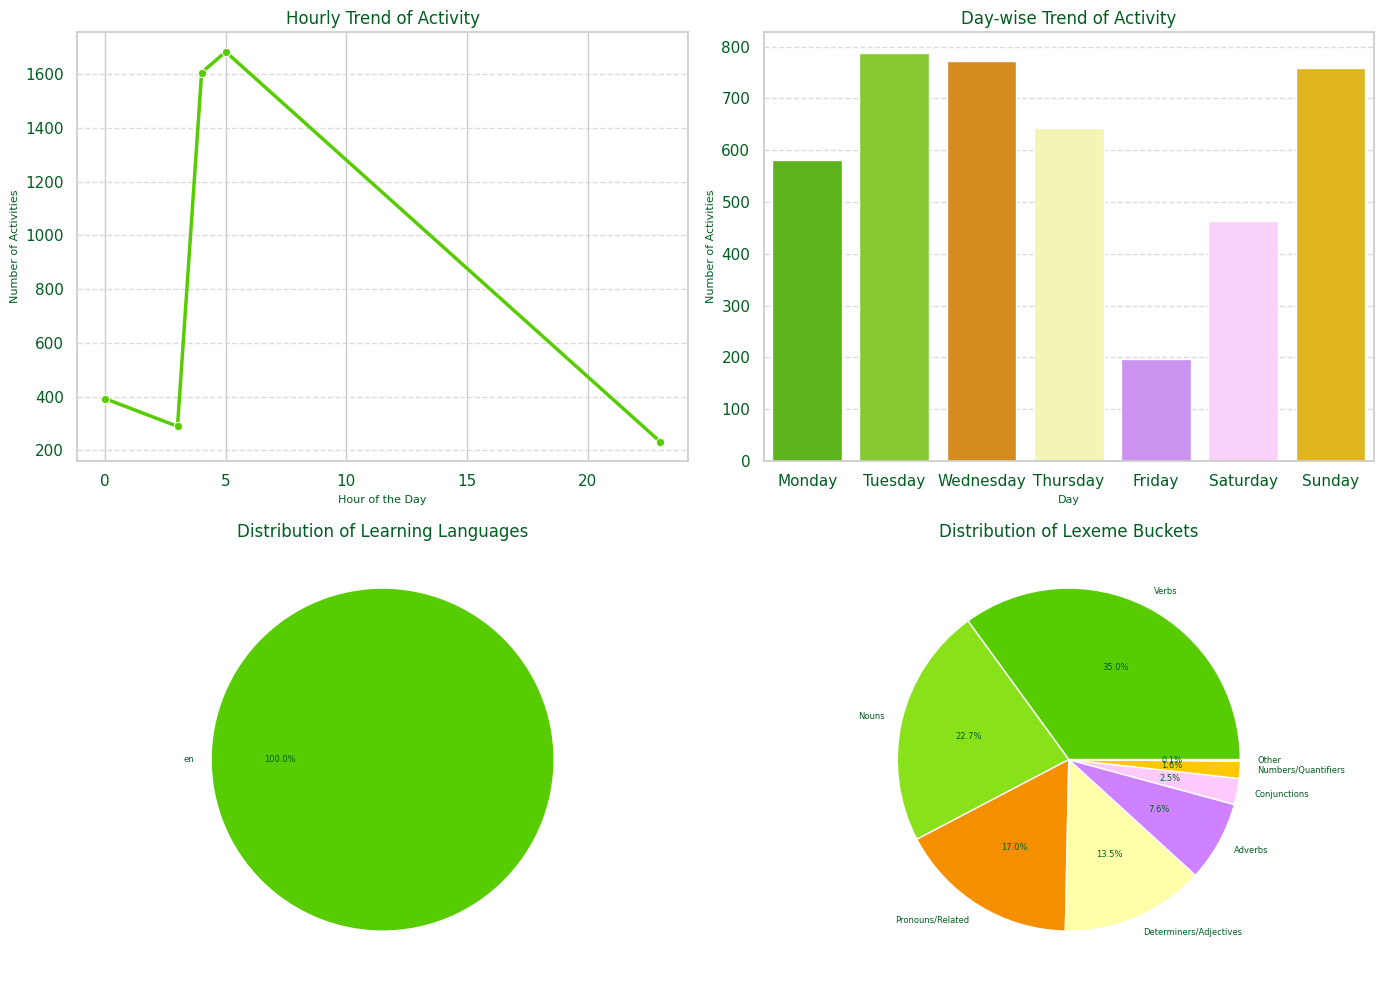

In [ ]:
# Customised Visualizations for the most active user
sns.set_theme(style="whitegrid")

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# 1. Hourly Trend
hourly_counts = most_active_data['hour'].value_counts().sort_index()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color=duolingo_colors[0], linewidth=2.5, ax=axes[0, 0])
axes[0, 0].set_title("Hourly Trend of Activity", fontsize=12, color="#005E20")
axes[0, 0].set_xlabel("Hour of the Day", fontsize=8, color="#005E20")
axes[0, 0].set_ylabel("Number of Activities", fontsize=8, color="#005E20")
axes[0, 0].tick_params(axis='both', colors="#005E20")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Day-wise Trend
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = most_active_data['day'].value_counts().reindex(day_order)
sns.barplot(x=day_counts.index, y=day_counts.values, palette=duolingo_colors, ax=axes[0, 1])
axes[0, 1].set_title("Day-wise Trend of Activity", fontsize=12, color="#005E20")
axes[0, 1].set_xlabel("Day", fontsize=8, color="#005E20")
axes[0, 1].set_ylabel("Number of Activities", fontsize=8, color="#005E20")
axes[0, 1].tick_params(axis='both', colors="#005E20")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Distribution of Learning Language (Pie Chart)
language_counts = most_active_data['learning_language'].value_counts()
axes[1, 0].pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=duolingo_colors[:len(language_counts)], textprops={'fontsize': 6, 'color': "#005E20"})
axes[1, 0].set_title("Distribution of Learning Languages", fontsize=12, color="#005E20")

# 4. Distribution of Lexeme Buckets (Pie Chart)
lexeme_bucket_counts = most_active_data['lexeme_bucket'].value_counts()
axes[1, 1].pie(
    lexeme_bucket_counts,
    labels=lexeme_bucket_counts.index,
    autopct='%1.1f%%',
    colors=duolingo_colors[:len(lexeme_bucket_counts)],
    textprops={'fontsize': 6, 'color': "#005E20"}
)
axes[1, 1].set_title("Distribution of Lexeme Buckets", fontsize=12, color="#005E20")

# Display the plots
plt.tight_layout()
plt.show()


# Customised Week in Review for any user

We will define a function where we can input user_id manually and inside the function we can define the KPIs and trending charts for the specific users.

In [ ]:
# Define the function
def user_analysis(data, user_id):
    """
    Analyze a user's activity and generate metrics and visualizations.

    Parameters:
    data (DataFrame): The dataset containing user activity data.
    user_id (str): The user ID to analyze.
    """
    # Filter data for the specific user
    user_data = data[data['user_id'] == user_id]

    # Compute requested metrics
    avg_p_recall = user_data['p_recall'].mean()
    avg_delta = user_data['delta'].mean()
    total_logins = len(user_data)
    languages_learning = user_data['learning_language'].unique().tolist()
    unique_lexeme_ids = user_data['lexeme_id'].nunique()

    most_active_day = user_data['day'].value_counts().idxmax()
    least_active_day = user_data['day'].value_counts().idxmin()
    most_active_hour = user_data['hour'].value_counts().idxmax()
    least_active_hour = user_data['hour'].value_counts().idxmin()

    # Print the metrics
    print("User Activity Metrics:")
    print(f"- Average P Recall: {avg_p_recall:.2f}")
    print(f"- Average Delta: {avg_delta:.2f}")
    print(f"- Total Logins: {total_logins}")
    print(f"- Languages Learning: {languages_learning}")
    print(f"- Unique Lexeme IDs Learned: {unique_lexeme_ids}")
    print(f"- Most Active Day: {most_active_day}")
    print(f"- Least Active Day: {least_active_day}")
    print(f"- Most Active Hour: {most_active_hour}")
    print(f"- Least Active Hour: {least_active_hour}")

    # Generate charts
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # Hourly Trend
    hourly_counts = user_data['hour'].value_counts().sort_index()
    sns.lineplot(
        x=hourly_counts.index,
        y=hourly_counts.values,
        marker='o',
        color=duolingo_colors[0],
        linewidth=2.5,
        ax=axes[0, 0]
    )
    axes[0, 0].set_title("Hourly Trend of Activity", fontsize=14, color="#005E20")
    axes[0, 0].set_xlabel("Hour of the Day", fontsize=12, color="#005E20")
    axes[0, 0].set_ylabel("Number of Activities", fontsize=12, color="#005E20")
    axes[0, 0].tick_params(axis='both', colors="#005E20")
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # Day-wise Trend
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = user_data['day'].value_counts().reindex(day_order)
    sns.barplot(
        x=day_counts.index,
        y=day_counts.values,
        palette=duolingo_colors,
        ax=axes[0, 1]
    )
    axes[0, 1].set_title("Day-wise Trend of Activity", fontsize=14, color="#005E20")
    axes[0, 1].set_xlabel("Day", fontsize=12, color="#005E20")
    axes[0, 1].set_ylabel("Number of Activities", fontsize=12, color="#005E20")
    axes[0, 1].tick_params(axis='both', colors="#005E20")
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # Learning Language Distribution (Pie Chart)
    language_counts = user_data['learning_language'].value_counts()
    axes[1, 0].pie(
        language_counts,
        labels=language_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=duolingo_colors[:len(language_counts)],
        textprops={'fontsize': 12, 'color': "#005E20"}
    )
    axes[1, 0].set_title("Distribution of Learning Languages", fontsize=14, color="#005E20")

    # Lexeme Bucket Distribution (Pie Chart)
    lexeme_bucket_counts = user_data['lexeme_bucket'].value_counts()
    axes[1, 1].pie(
        lexeme_bucket_counts,
        labels=lexeme_bucket_counts.index,
        autopct='%1.1f%%',
        colors=duolingo_colors[:len(lexeme_bucket_counts)],
        textprops={'fontsize': 12, 'color': "#005E20"}
    )
    axes[1, 1].set_title("Distribution of Lexeme Buckets", fontsize=14, color="#005E20")

    # Show plots
    plt.show()

# Example usage
# user_analysis(data, 'bcH_')


In [ ]:
# Define the parameter as input
user_input = input("Enter the user identifier: ")

# Pass the input to the function
user_analysis(data, user_input)

In [ ]:
# Select the sampled 50000 rows
subset_df = data.sample(n=50000)

# Save the subset as a CSV file
subset_df.to_csv("df_data_50000_rows.csv", index=False)

# Download the file
files.download("df_data_50000_rows.csv")